<a href="https://colab.research.google.com/github/gayatri5425/play-store-app-analysis-from-alma-better/blob/main/Gayatri_Jiddewar_Bike_sharing_Demand_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME :- GAYATRI JIDDEWAR**

**PROJECT TYPE :- Regression**

**PROJECT NAME :- BIKE SHARING DEMAND PREDICATION**


**CONTRIBUTION :- INDIVIDUAL**














# **PROBLEM DISCRIPTION**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

**DATA DESCRIPTION**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:

from ast import increment_lineno
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import datetime as dt



from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings('ignore')





In [ ]:

# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting max display column limit to 20
pd.set_option("display.max_columns", 25)

#set style
plt.style.use('seaborn')


from scipy import optimize


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# let's mount the  google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the seol bike dataframe from drive
df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding ='latin' )

**Data Exploration And Data cleaning**

In [ ]:
df.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.shape

(8760, 14)

In [ ]:
#Getting all the columns
print('Features of the dataset')
df.columns

Features of the dataset


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Categorical Features: Seasons, Holiday and Functioning day.

Numerical Columns: Date, Hour, Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar radiation, Rainfall, Snowfall, Rented Bike count .

In [ ]:

#Since the variables having units with name, renaming columns for better variable analysis.
df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

We change the data tyep of date column from object to datetime64ns.this was done for feature engineering.

We Created two new columns with the help of Date column ‘Month’ and ‘Day’. Which were further used for EDA. And later we dropped Date column.



In [ ]:

# Change The datatype of Date columns to extract 'Month' ,'Day', "year". so  further we can analyze the Bike rentals with respect to year months and days.
df['Date']=df['Date'].astype('datetime64[ns]')


In [ ]:

# Creating new columns 'Month', 'Year' ,'Day.
df['Month']=df['Date'].dt.month

df['Day']=df['Date'].dt.day_name()  

In [ ]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
df['Weekdays_or_weekend']=df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [ ]:
# check the Newly Created columns
df.head(2)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  Month       Day  Weekdays_or_weekend  
0  Winter  No Holiday             Yes      1  Thursday                    0  
1  Winter  No Holiday             Yes      1  Thursday                    0

In [ ]:
# Now We can Drop Day and Date columns.

df.drop(['Date',"Day"],axis=1 ,inplace=True)

In [ ]:
#Get distinct categories counts forSeasons categories
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
 #Get distinct categories counts for Holiday categories
 df['Holiday'].value_counts()

Series([], Name: Holiday, dtype: int64)

In [ ]:
#Get distinct categories counts for Functioning_Day categories
df['Functioning_Day'].value_counts()

Series([], Name: Functioning_Day, dtype: int64)

In [ ]:
#Get distinct categories counts for for Month categories
df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [ ]:
#Get distinct categories counts for for Weekdays_or_weekend categories
df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [ ]:
## Check the Summary of Bike data to get mean,max,25%,50%,75% etc

df.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall        Month  Weekdays_or_weekend  
count  8760.000000  8760.000000          8760.000000  
mean      0.075068     6.526027             0.290411  
std       0.436746     3.448048             0.453978  
min       0.000000     1.000000             0.000000  
25%       0.000000     4.000000             0.000000  
50%       0.000000     7.000000             0.000000  
75%       0.000000    10.000000             1.000000  
max       8.800000    12.000000             1.000000

In [ ]:
df.describe().T

count         mean         std   min     25%      50%  \
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   
Month                  8760.0     6.526027    3.448048   1.0    4.00     7.00   
Weekdays_or_weekend    8760.0     0.290411    0.453978   0.0    0.00     0.00   

                           75%      max  
Rented_Bike_Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80  
Month                    10.00    12.00  
Weekdays_or_weekend       1.00     1.00

In [ ]:
df.isnull().values.any()

False

In [ ]:
# check for count of missing values in each column.
df.isna().sum()
df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Weekdays_or_weekend      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

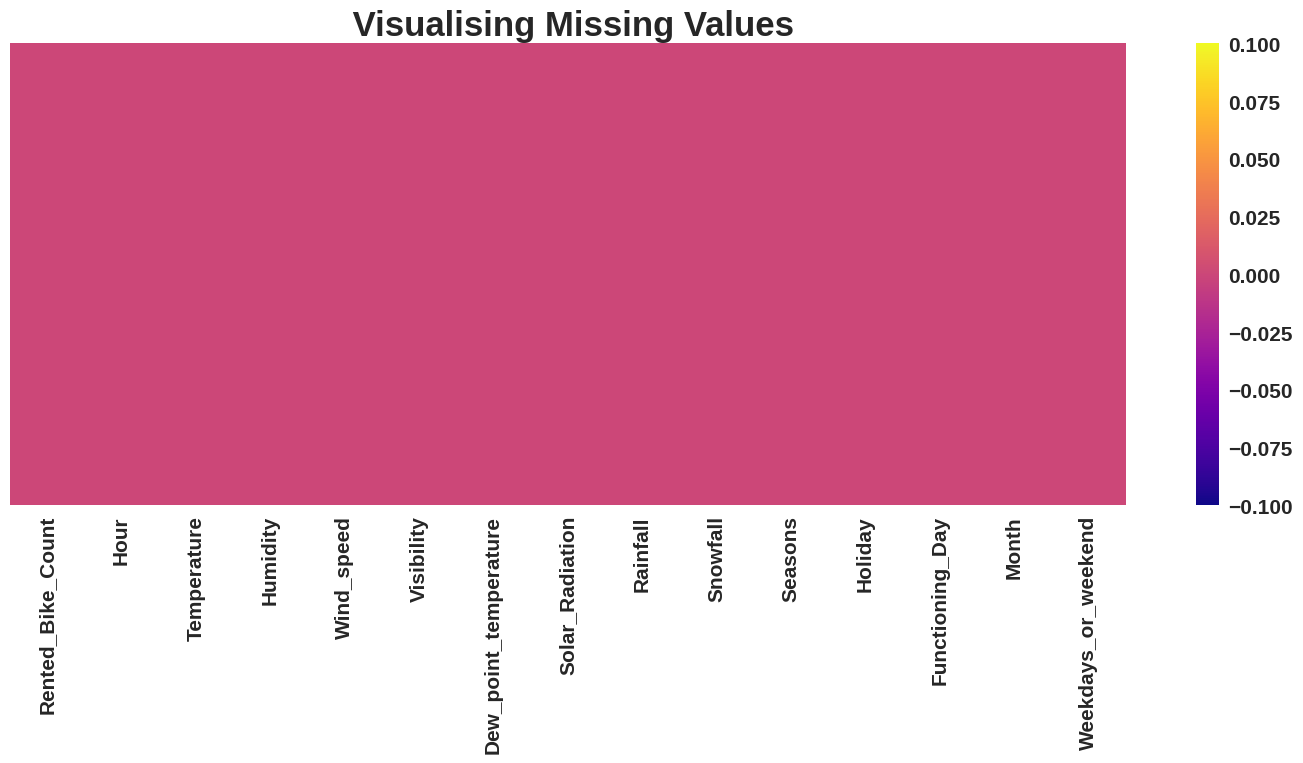

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")
     

In [ ]:
# checking Duplicate rows in our BikeData.
duplicates=df.duplicated().sum()
print(f"We have {duplicates} rows in our Bike Data.")
# No duplicate rows found
     

We have 0 rows in our Bike Data.


**EDA ANALYSIS**

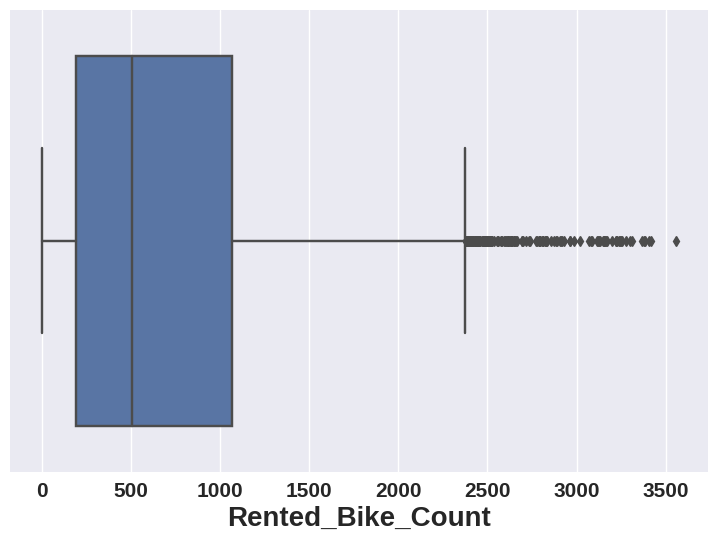

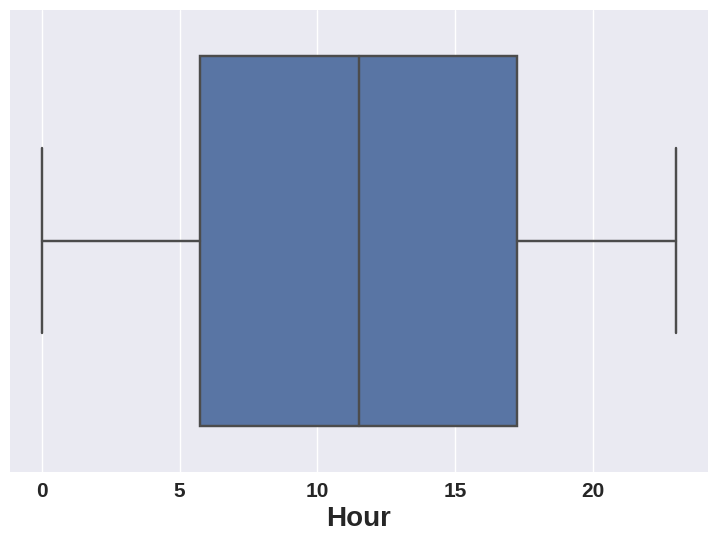

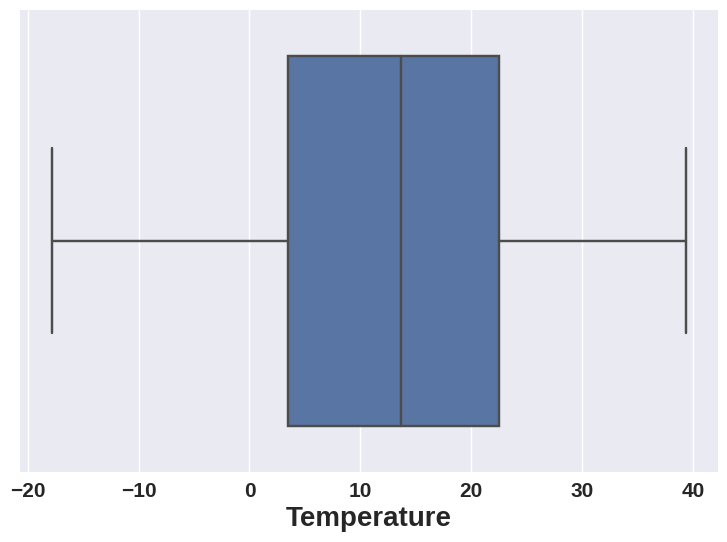

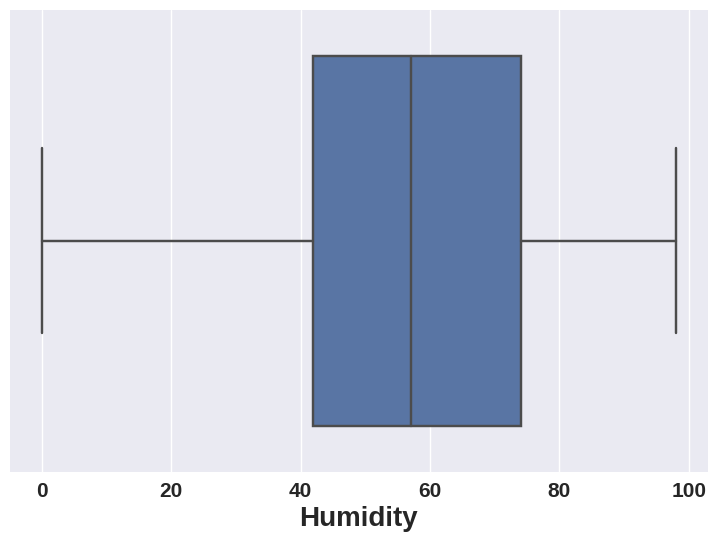

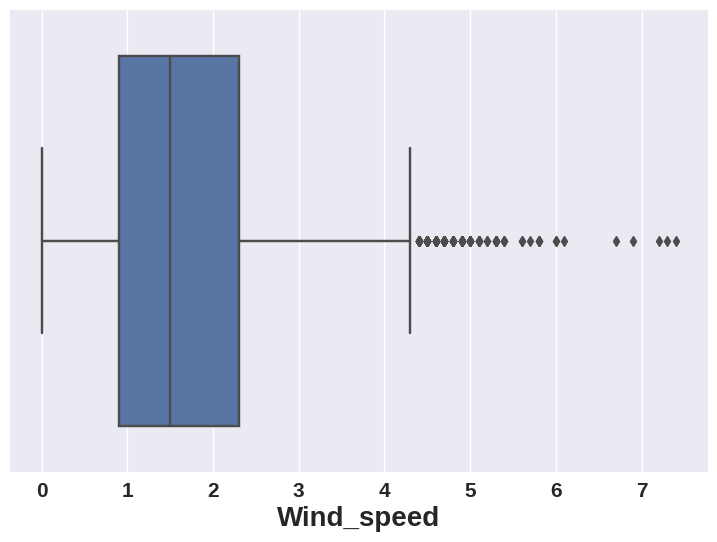

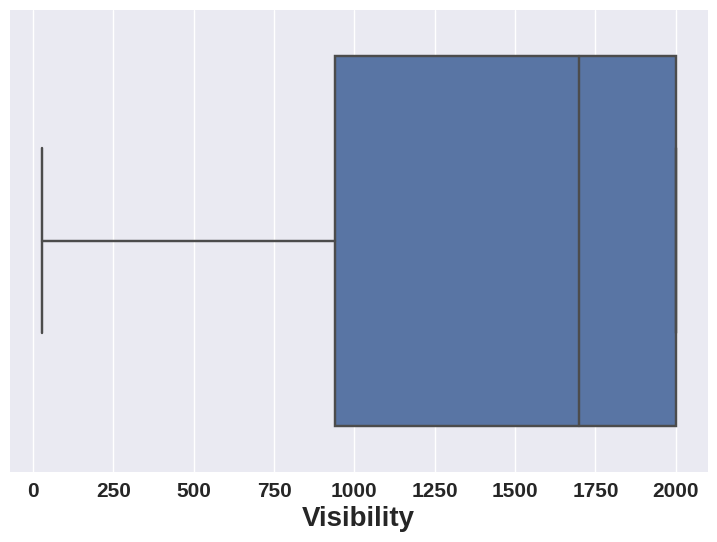

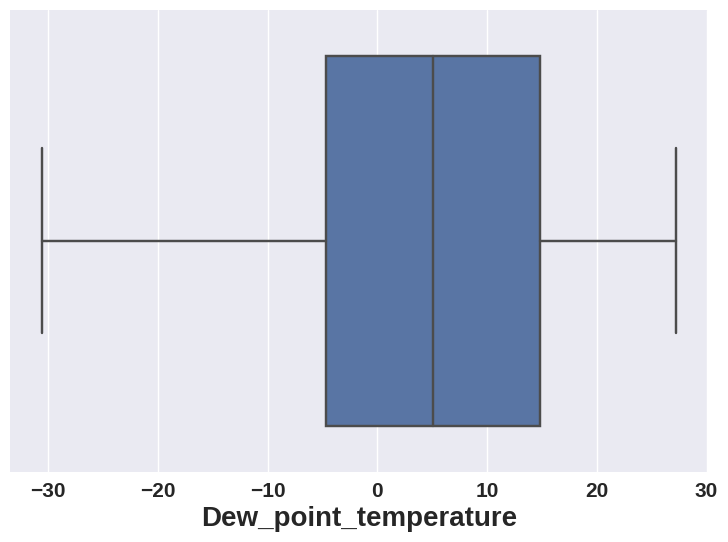

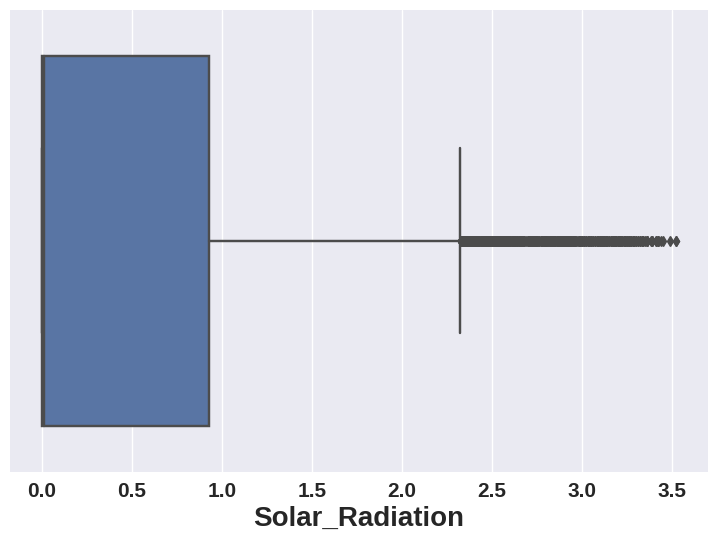

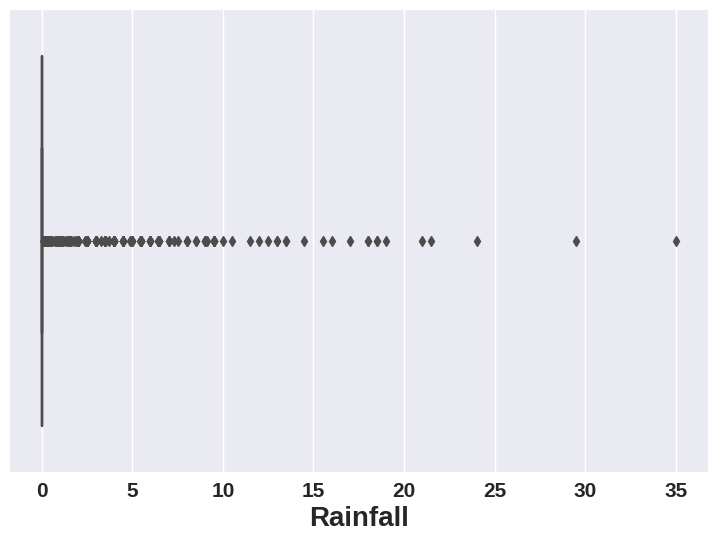

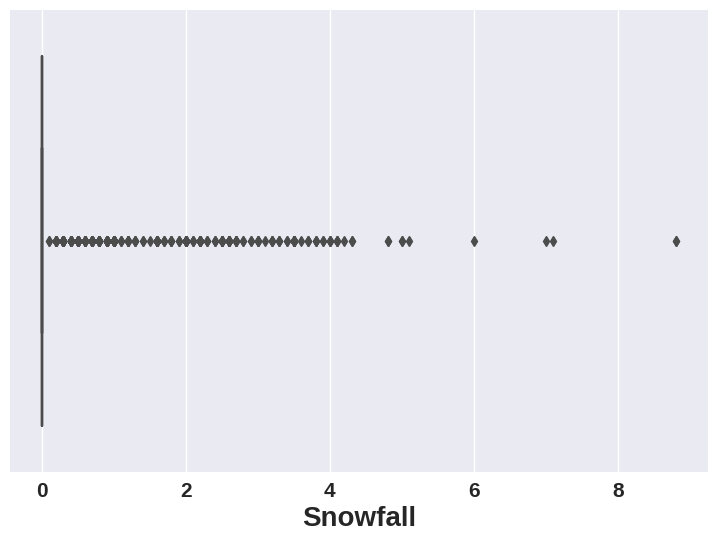

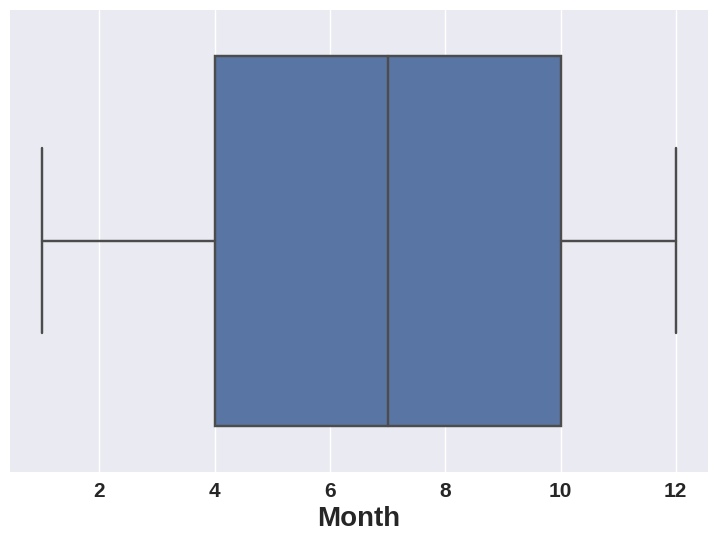

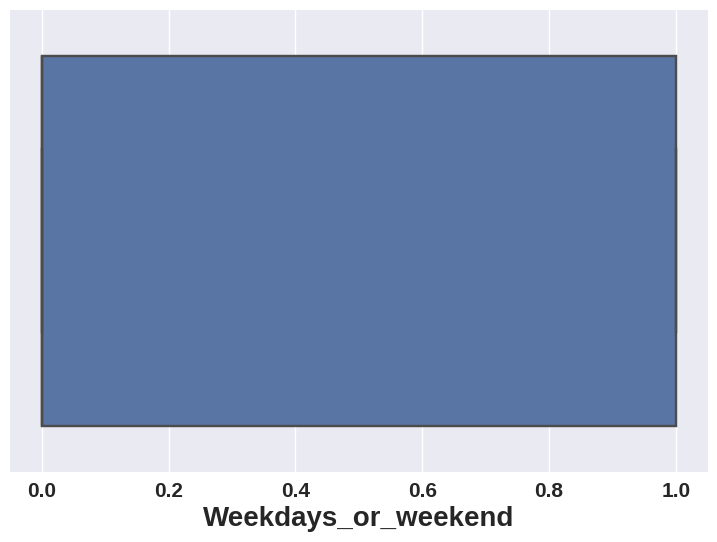

In [ ]:
# create numeric columns list.
numeric_col=df.describe().columns.tolist()
numeric_col

# create categorical column list
categorical_columns= list(set(df.columns) - set(df.describe().columns))
categorical_columns

# priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=df[col])

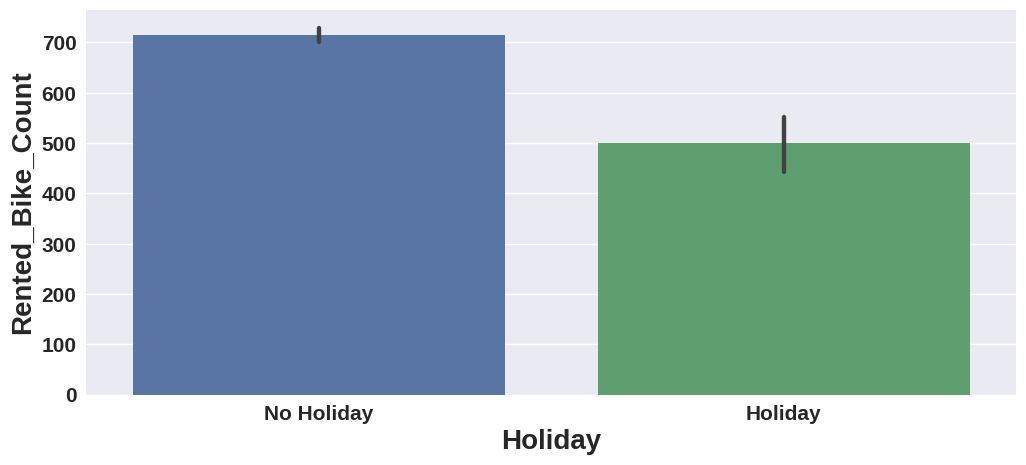

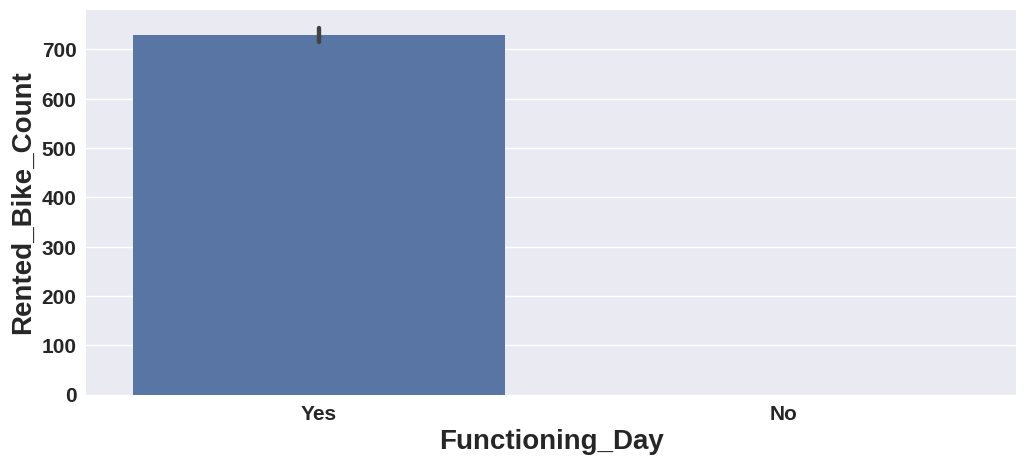

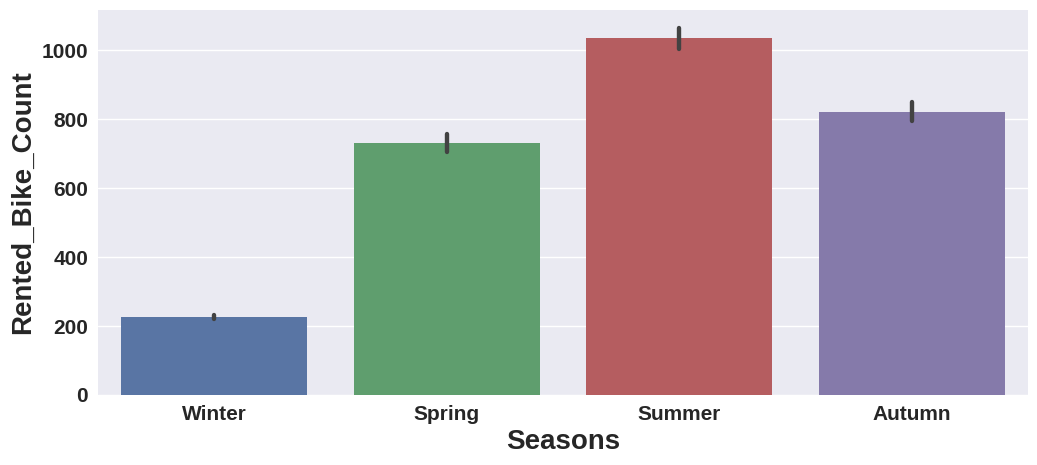

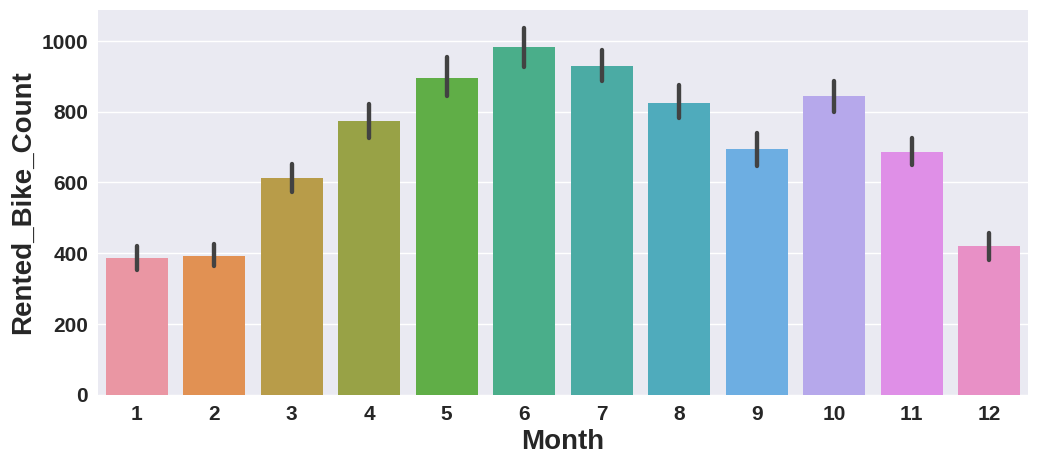

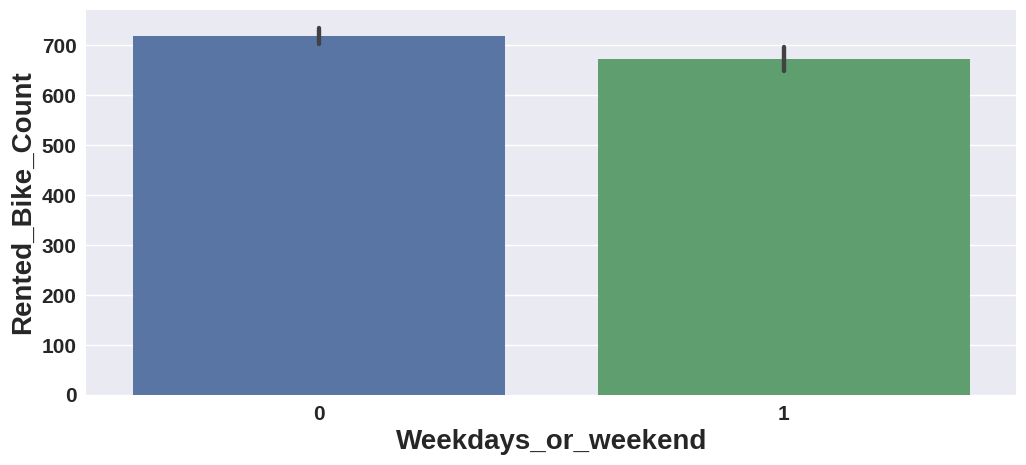

In [ ]:
# adding two  more categorical columns 
categorical_columns.extend(['Month','Weekdays_or_weekend'])

# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x=df[col],y=df['Rented_Bike_Count'])

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

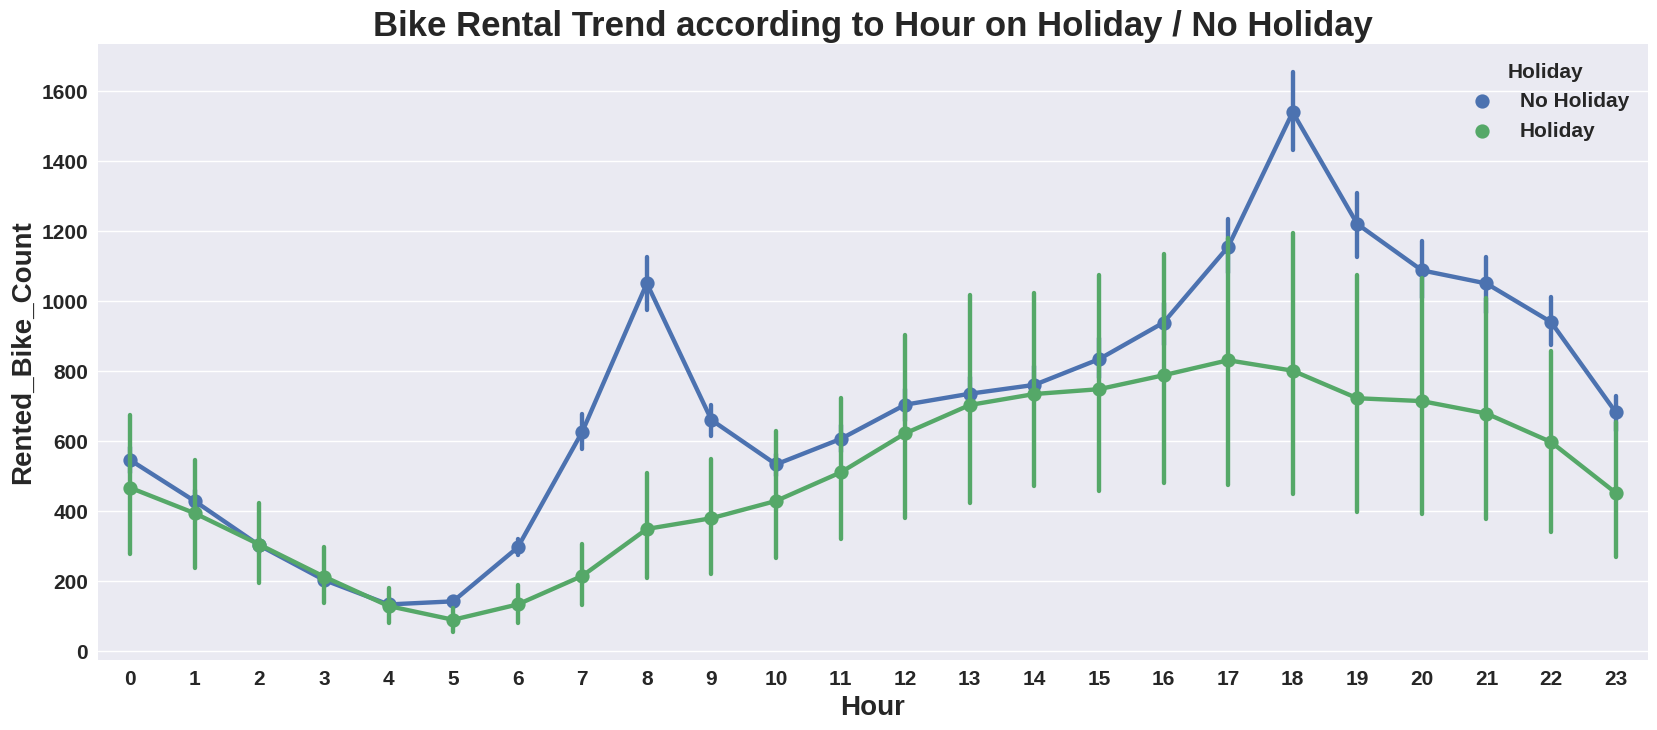

In [ ]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,8))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Observation

1)There is sudden peak between 6,7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different less bike rentals happend.

2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.( NO Holiday).

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

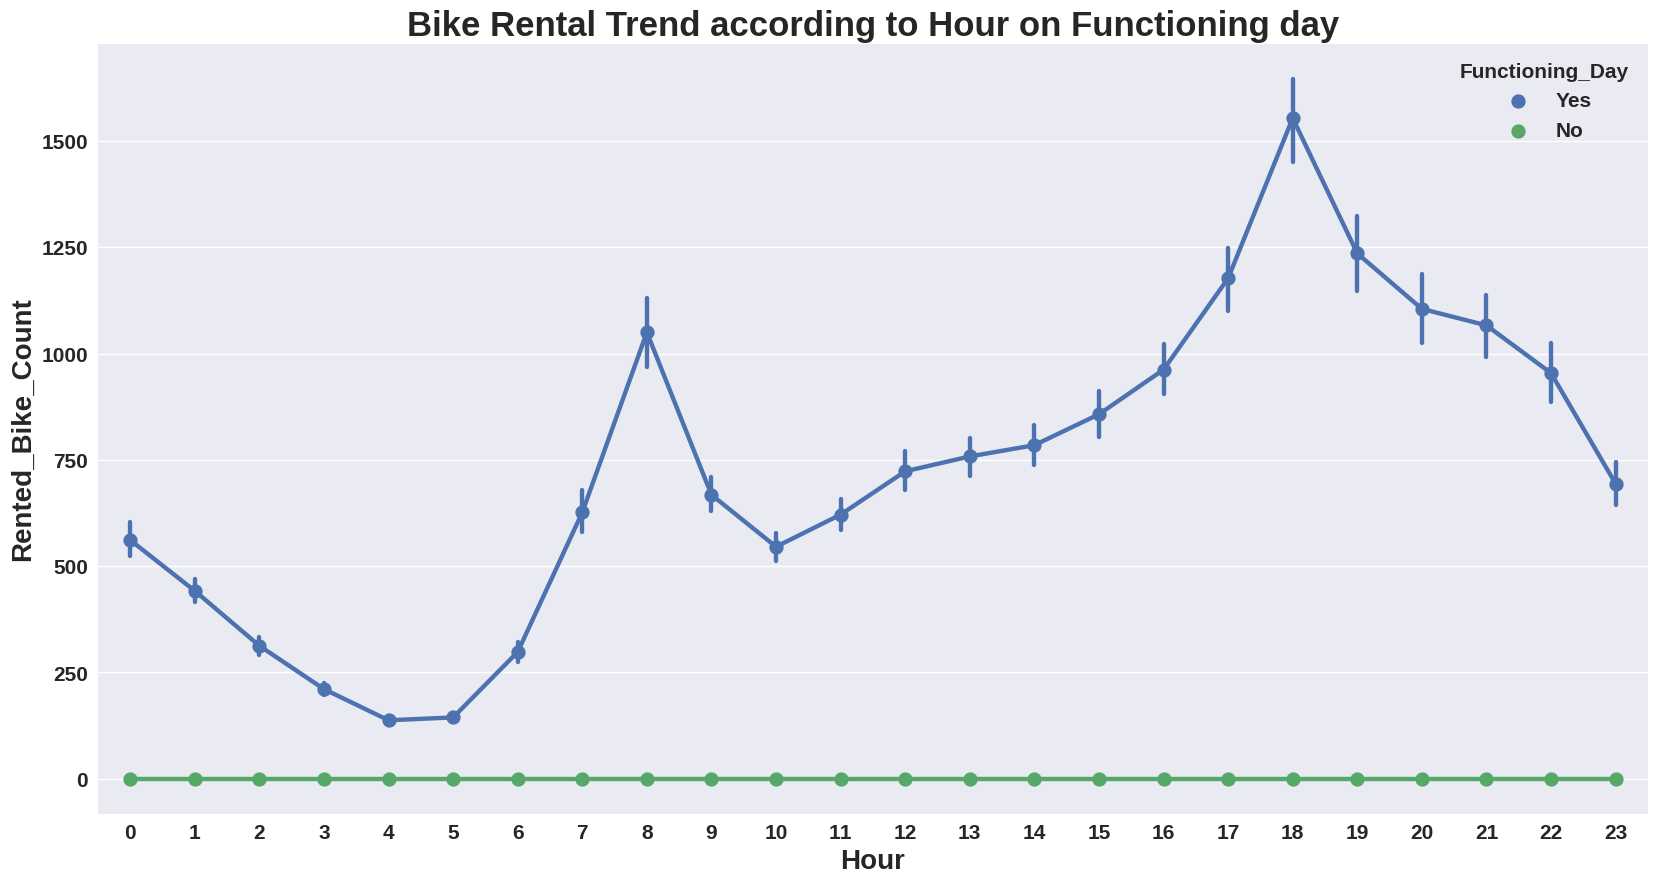

In [ ]:
## Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")
     

**Observation**

1) Here the trend for functioning day is same as of No holiday. Only the difference is on No functioning day there is no bike rentals. (if we drop no fucntioning day rows. we will left only with the functioning day values.thus the column having same value through out will not be helpful.So,its better to drop the column.)

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

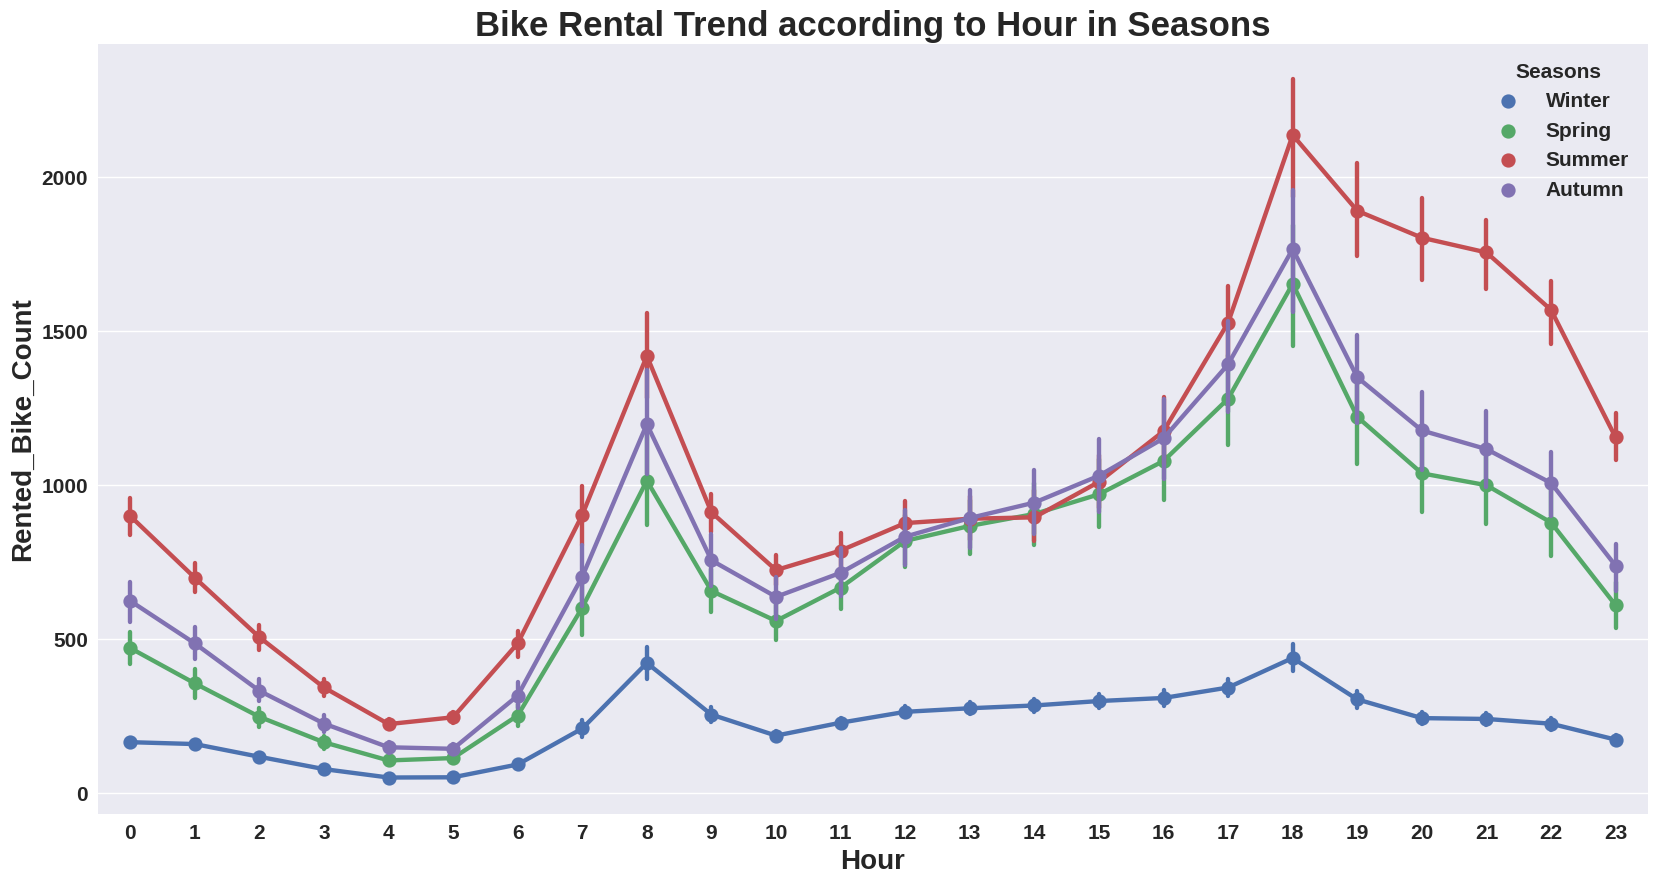

In [ ]:
## Bike Rent Count trend with respect Hours on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Seasons'])
plt.title("Bike Rental Trend according to Hour in Seasons")

In [ ]:
## Bike Rent Count trend with respect Hours on Months
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Month'])
plt.title("Bike Rental Trend according to Hour in different months")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  Weekdays_or_weekend    8760 non-null   int64  
dtypes: f

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

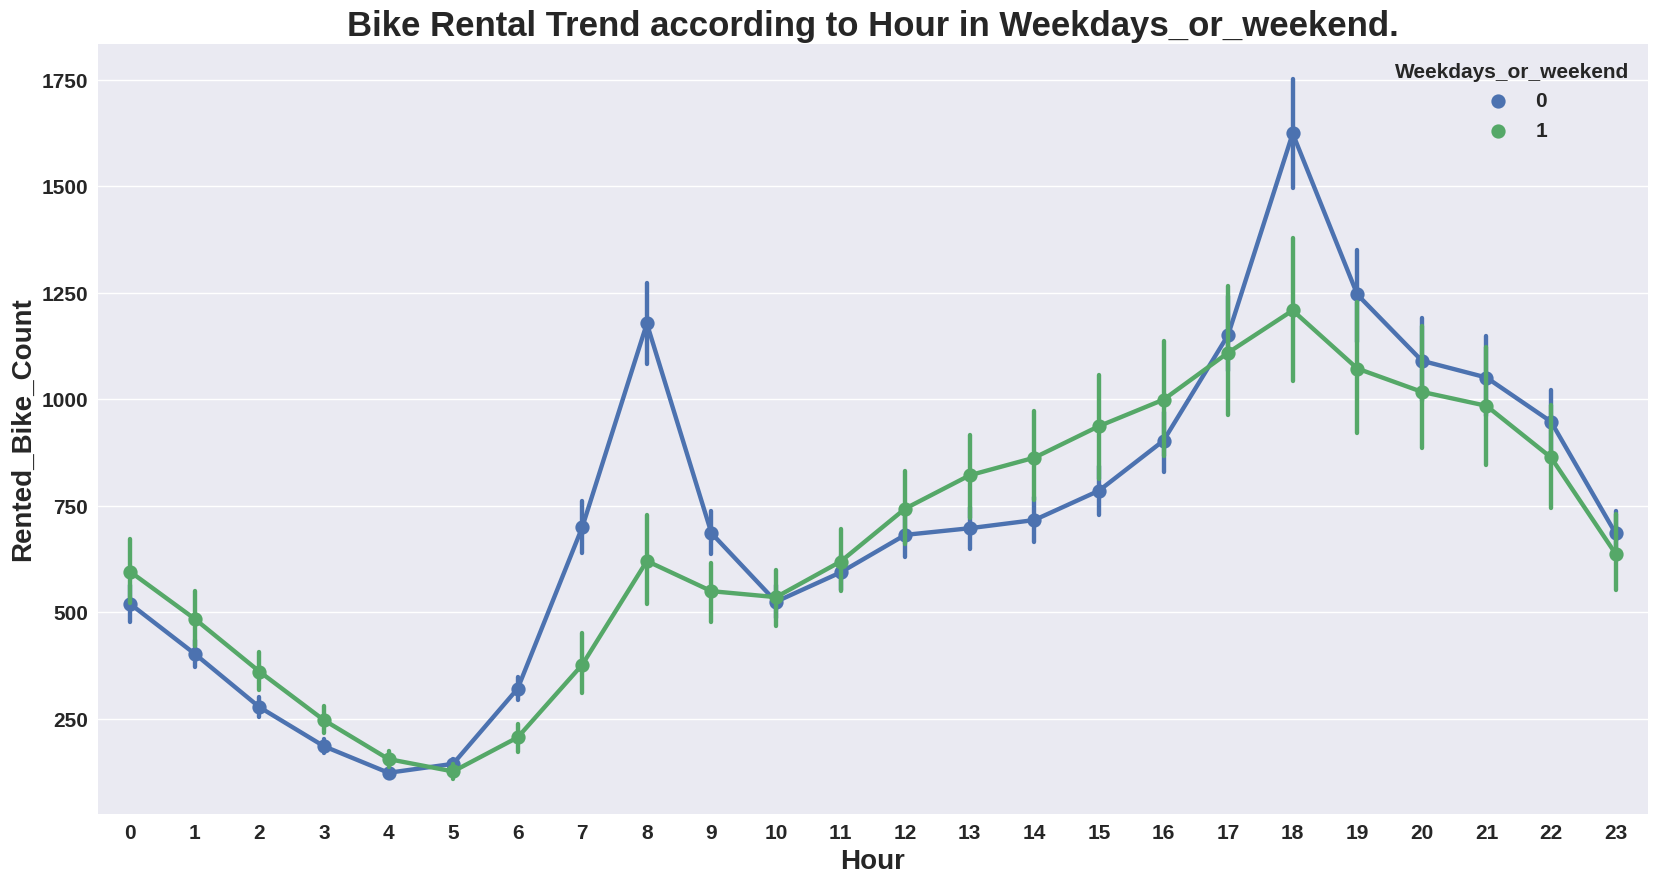

In [ ]:
## Bike Rent Count trend with respect Hours on Weekdays or weekends
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")
# 0= weekdays
#1= weekend

**Our target varibale's distribution is slightly right skewed.**

<Axes: xlabel='Rented_Bike_Count'>

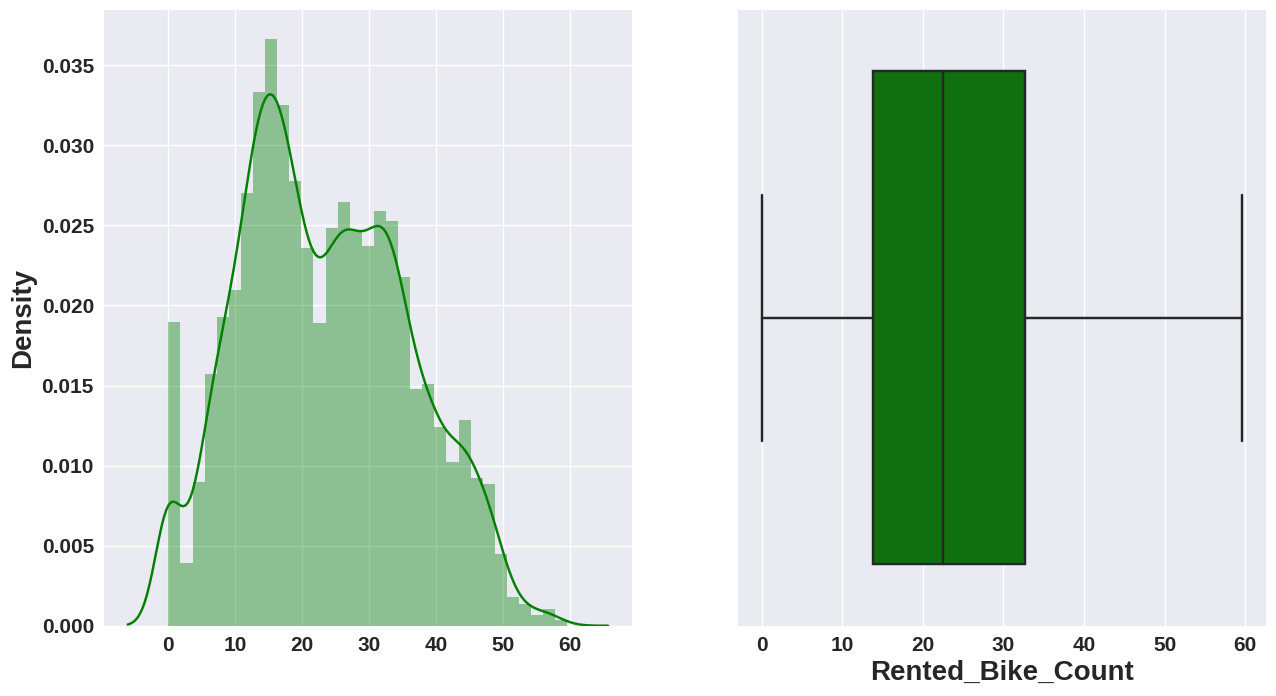

In [ ]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[1])

Thus we normalized our dependent variable by square root method and also in boxplot we can see there are no outliers present.

**Let's check distribution of independent variables**

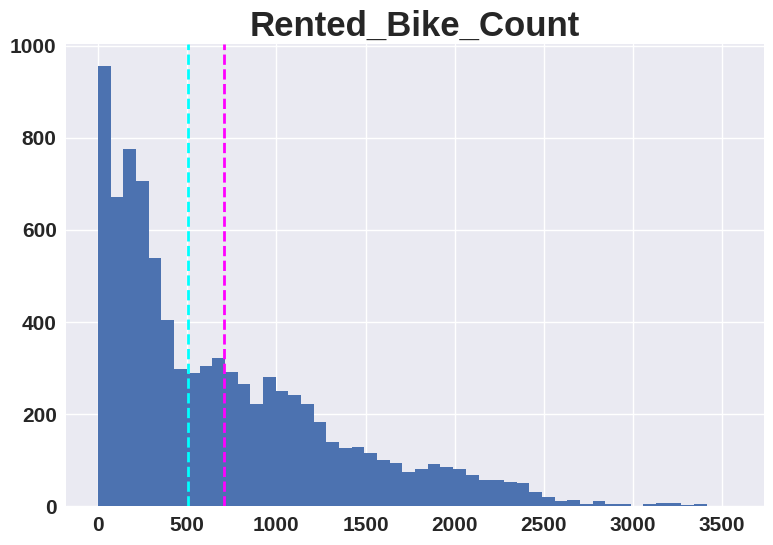

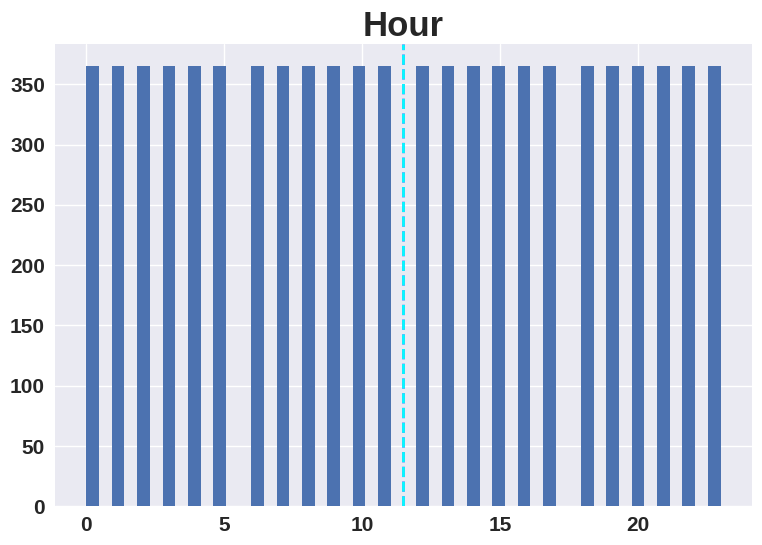

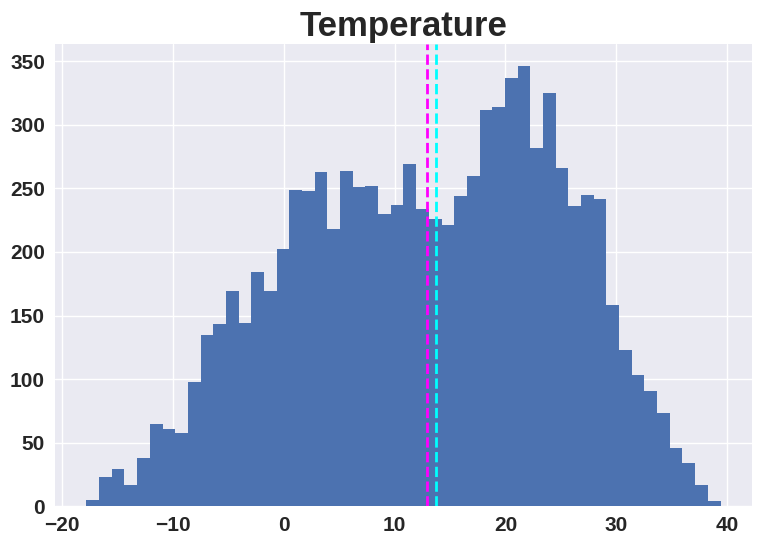

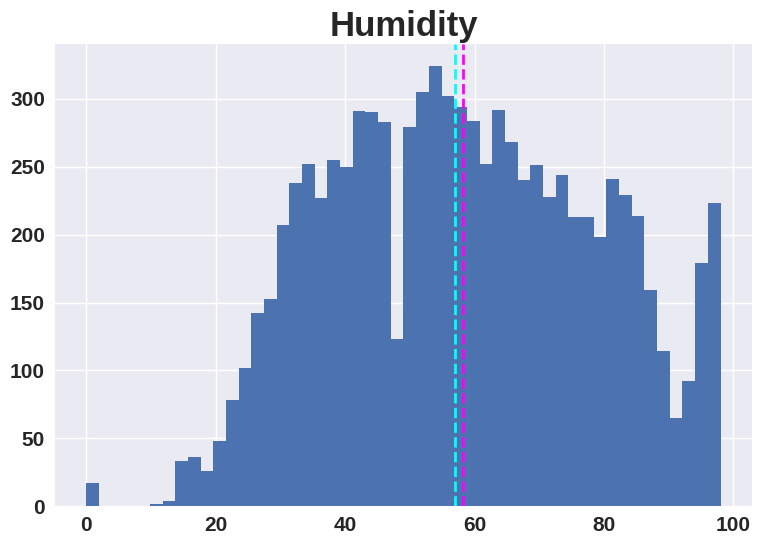

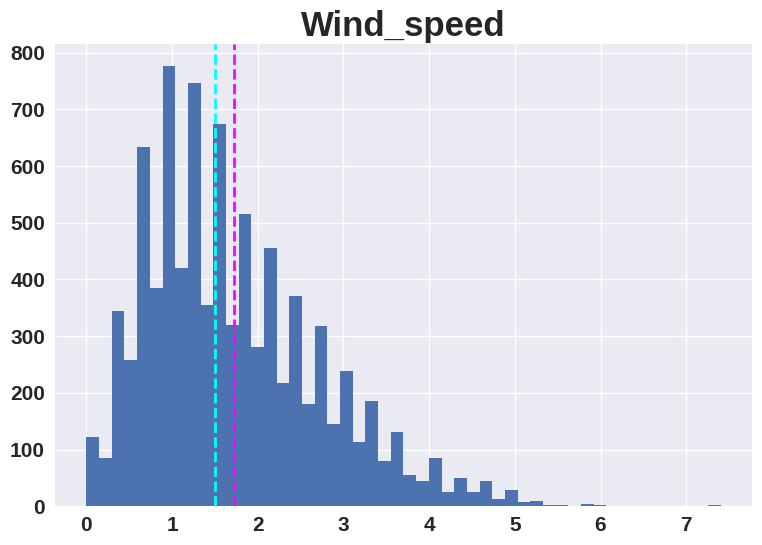

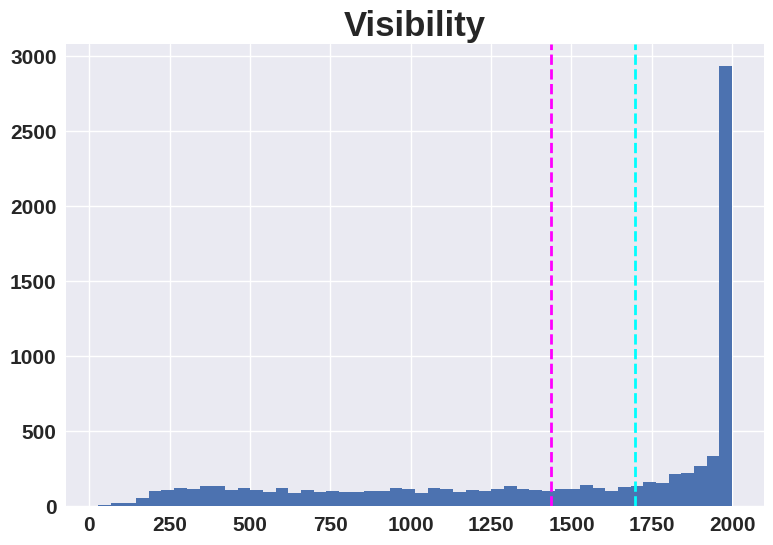

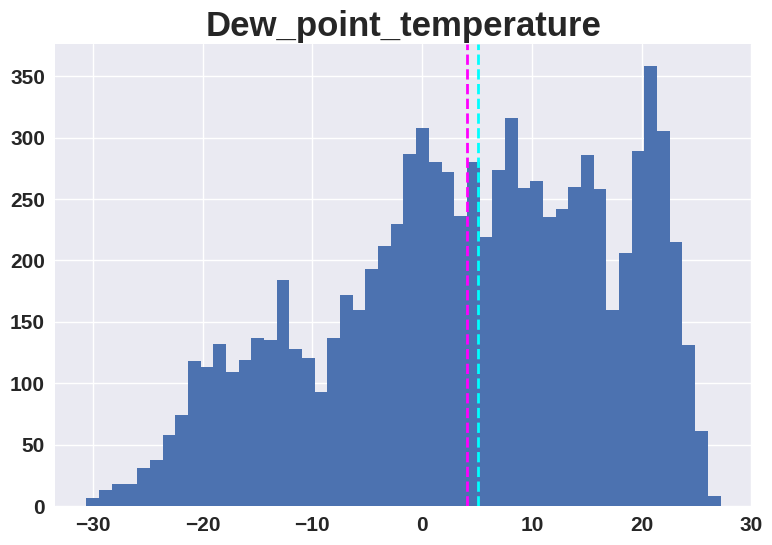

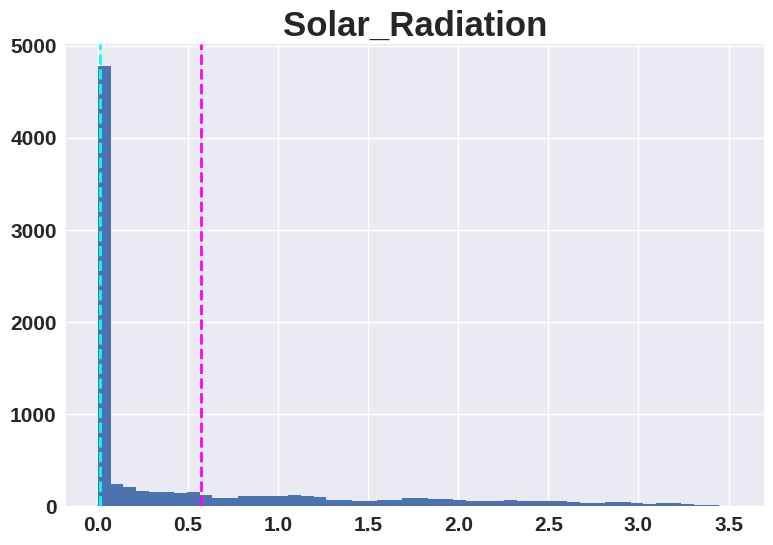

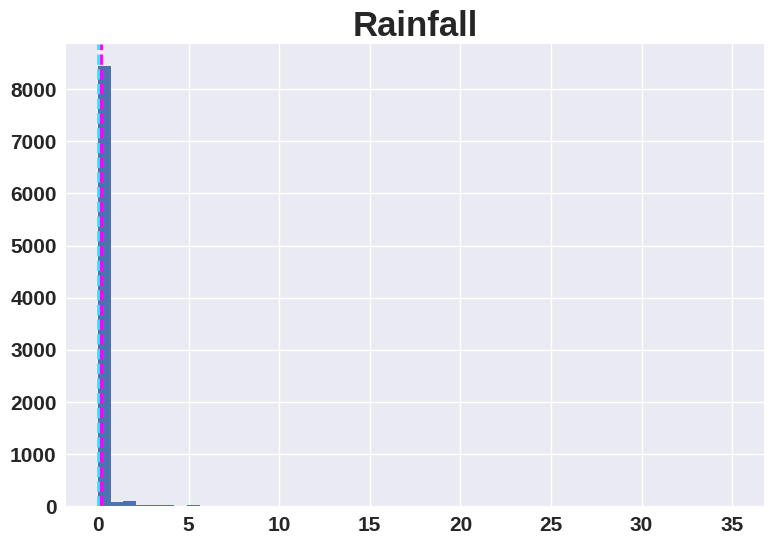

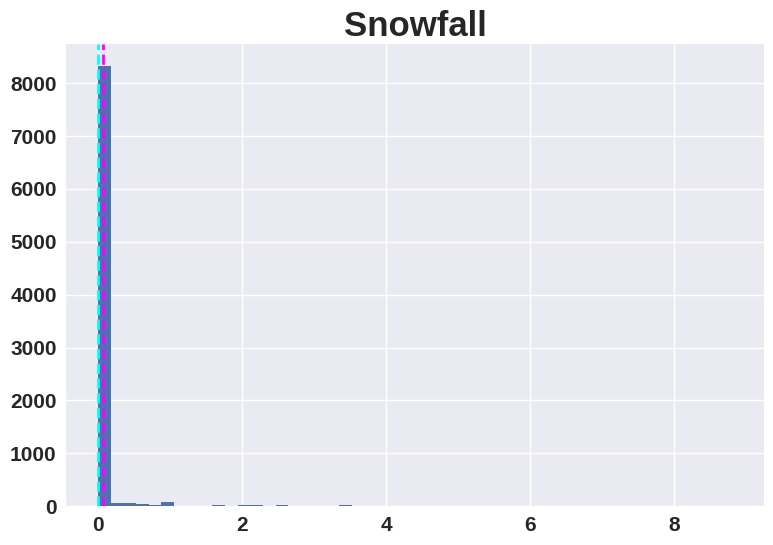

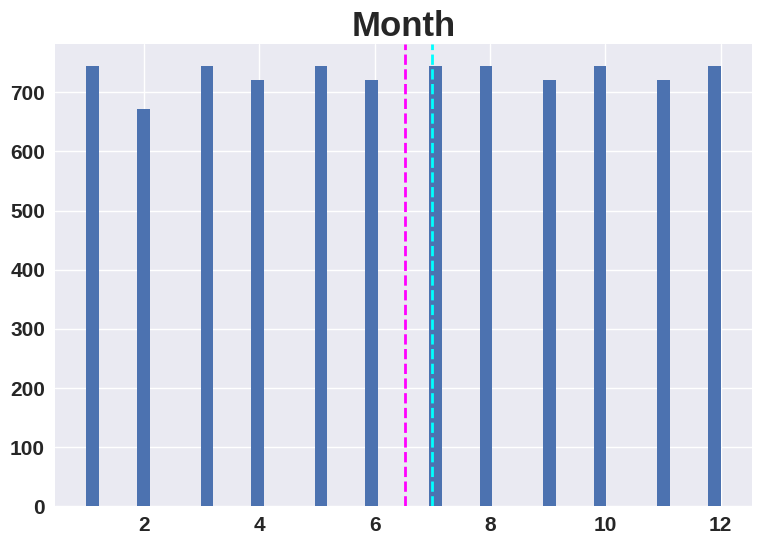

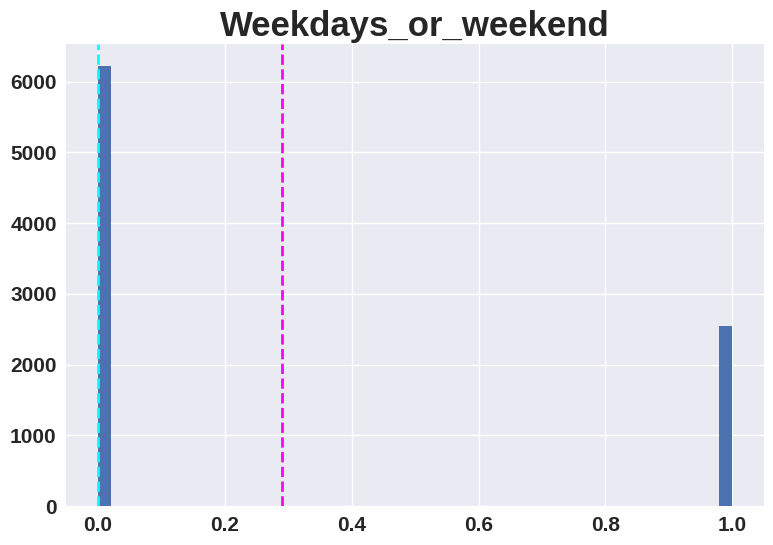

In [ ]:

# Plot  a histogram graph to check where mean and medians are lying in the distribution and the data points in variables are distributed.

for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()
     

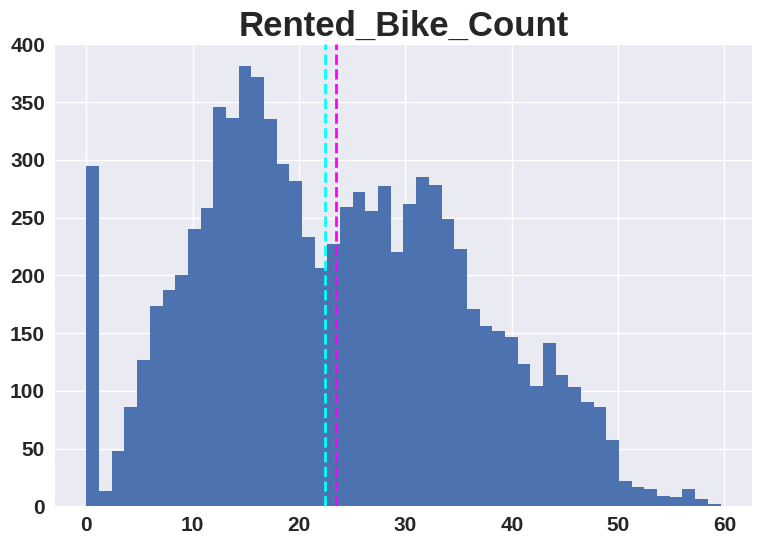

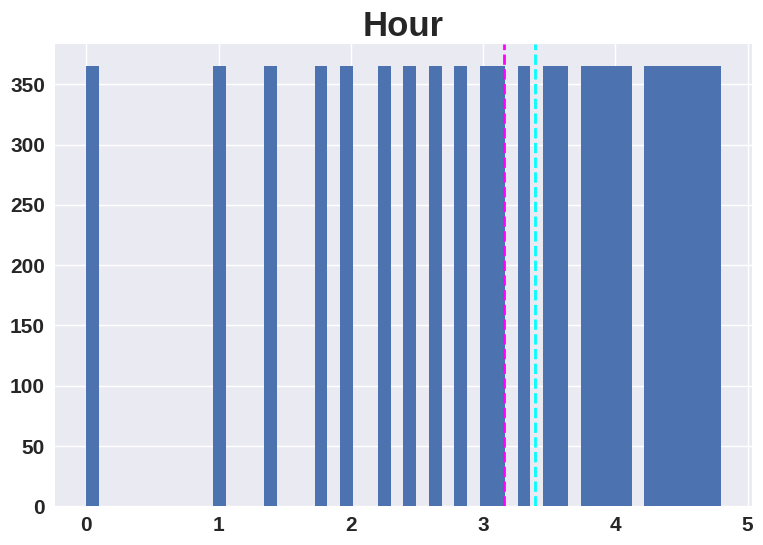

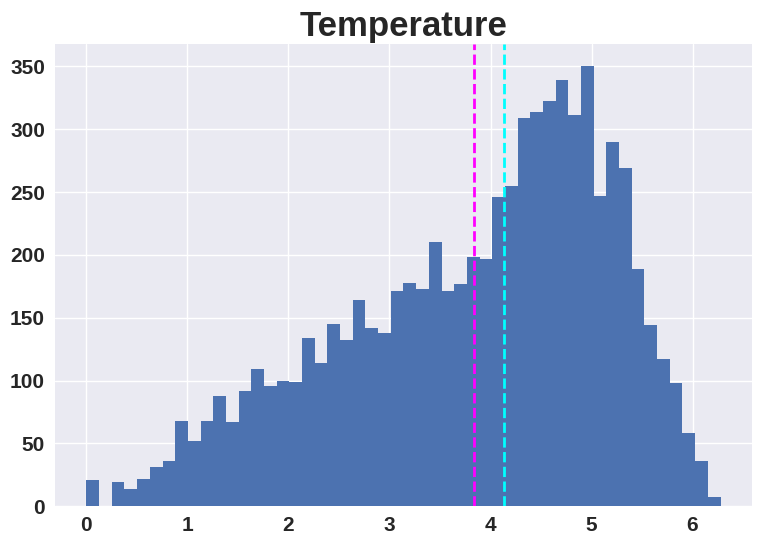

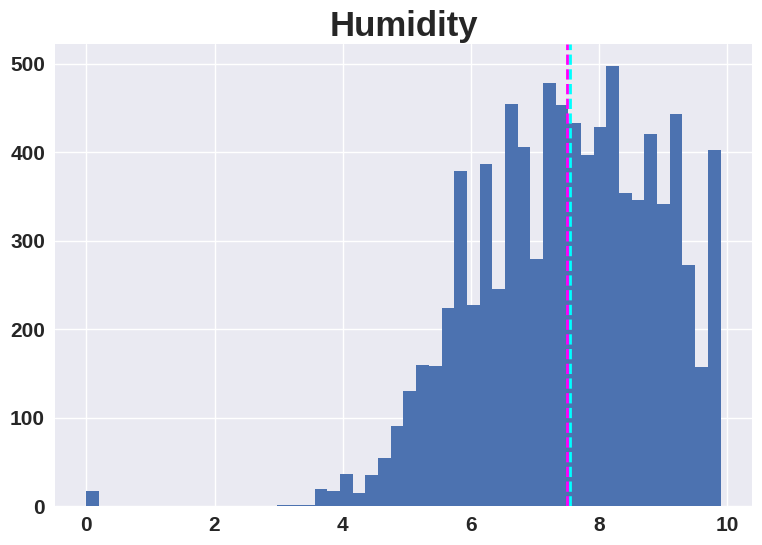

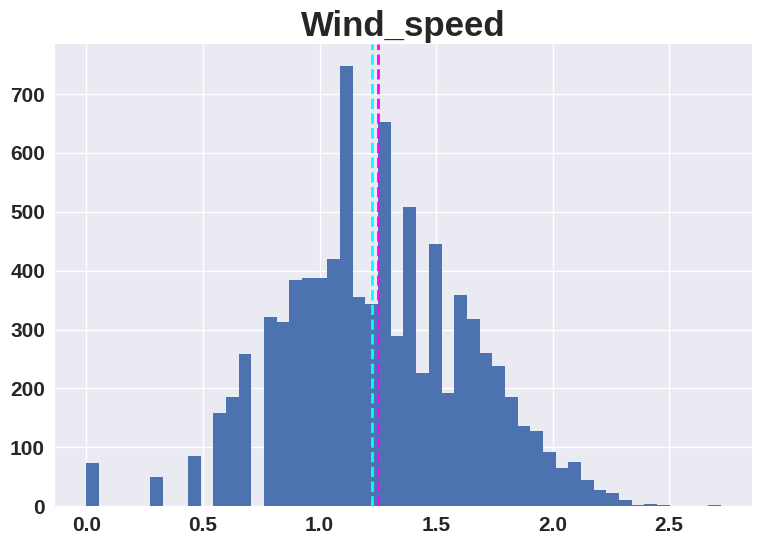

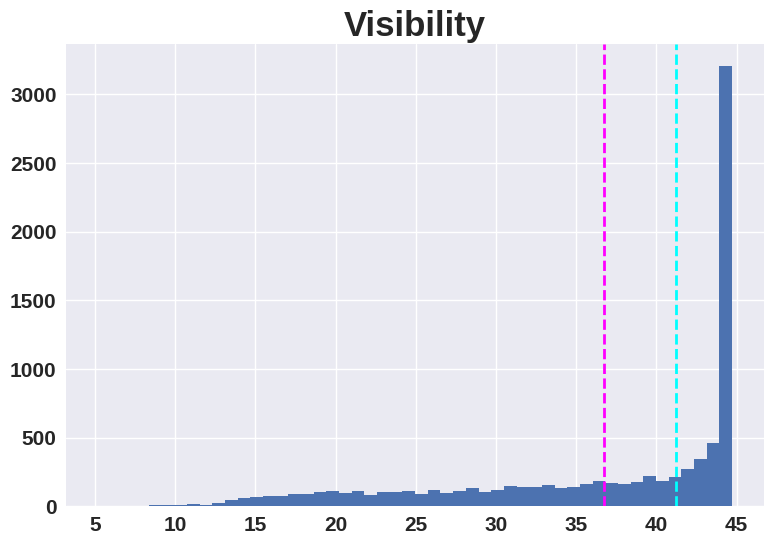

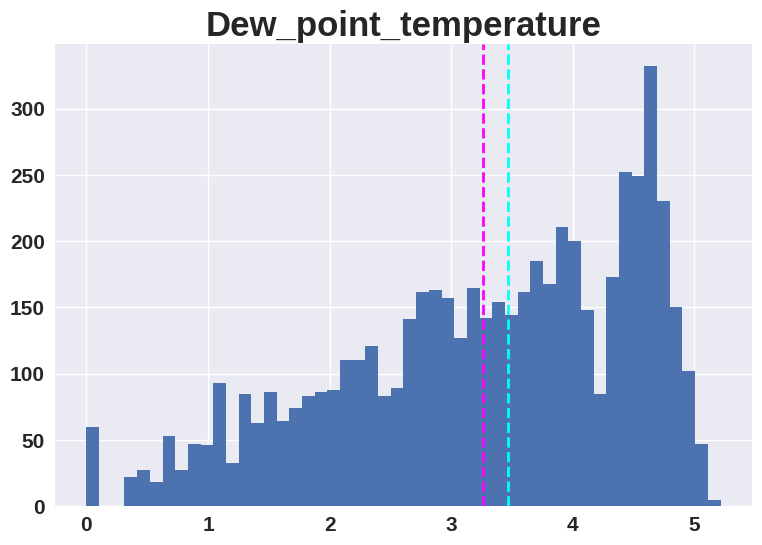

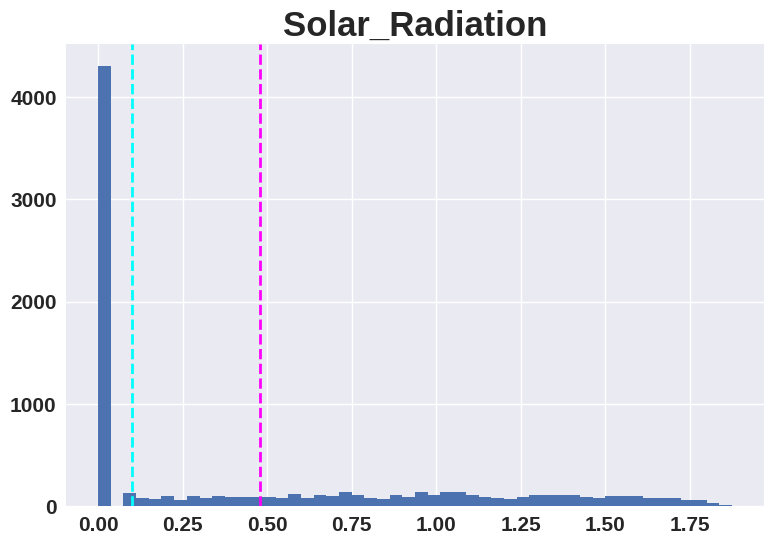

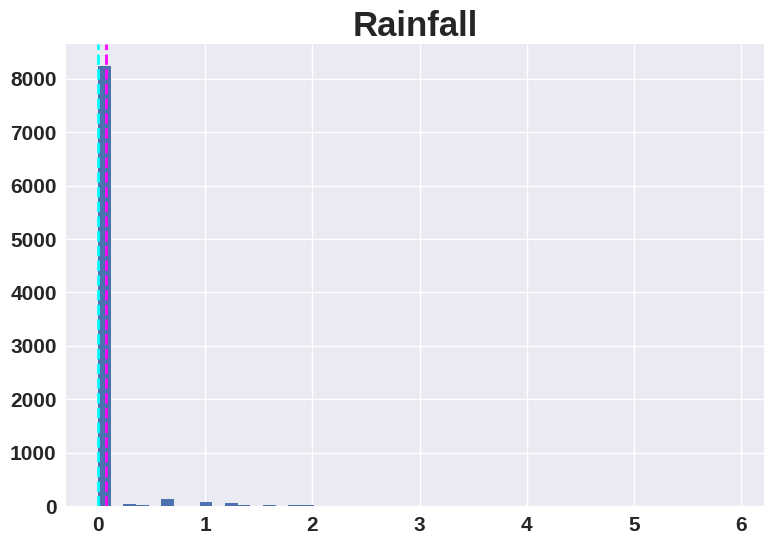

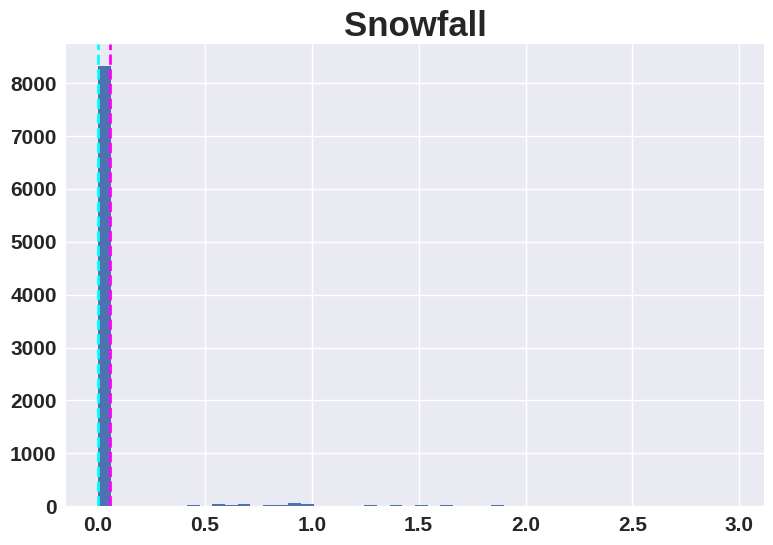

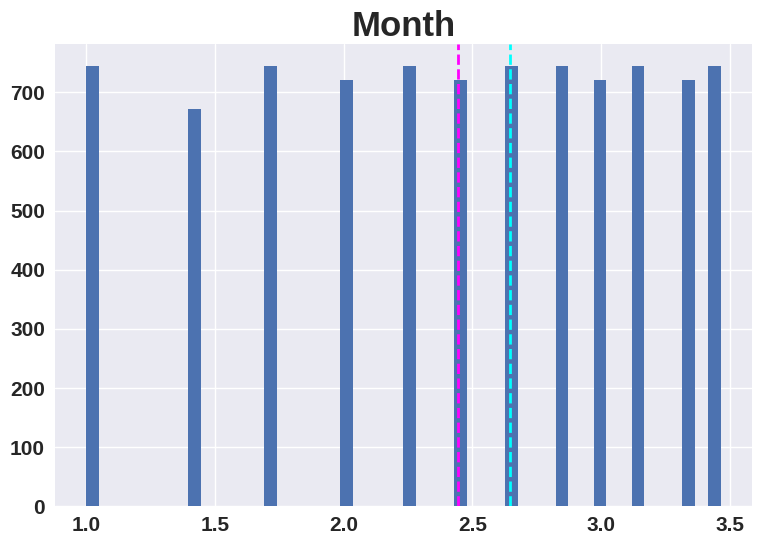

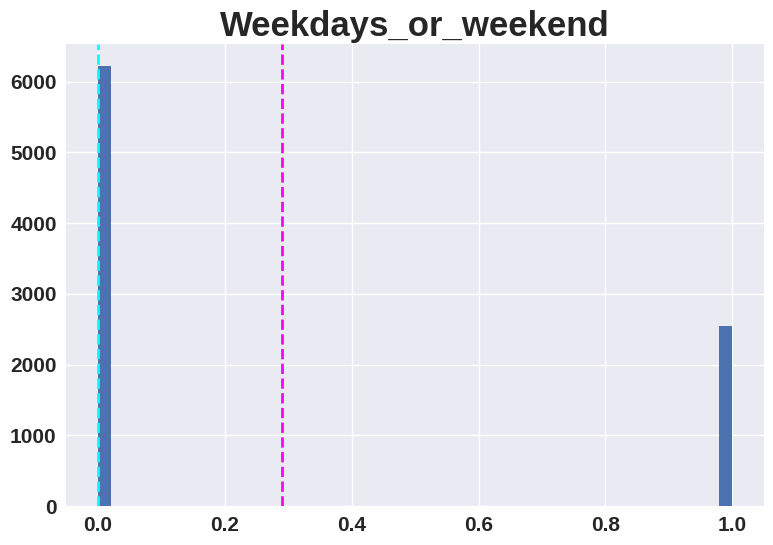

In [ ]:
# Normalizing The variables using squre root method.
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Lets check the relationship between the dependent variable-"Rented Bike Count'and remaining columns(independent variable).

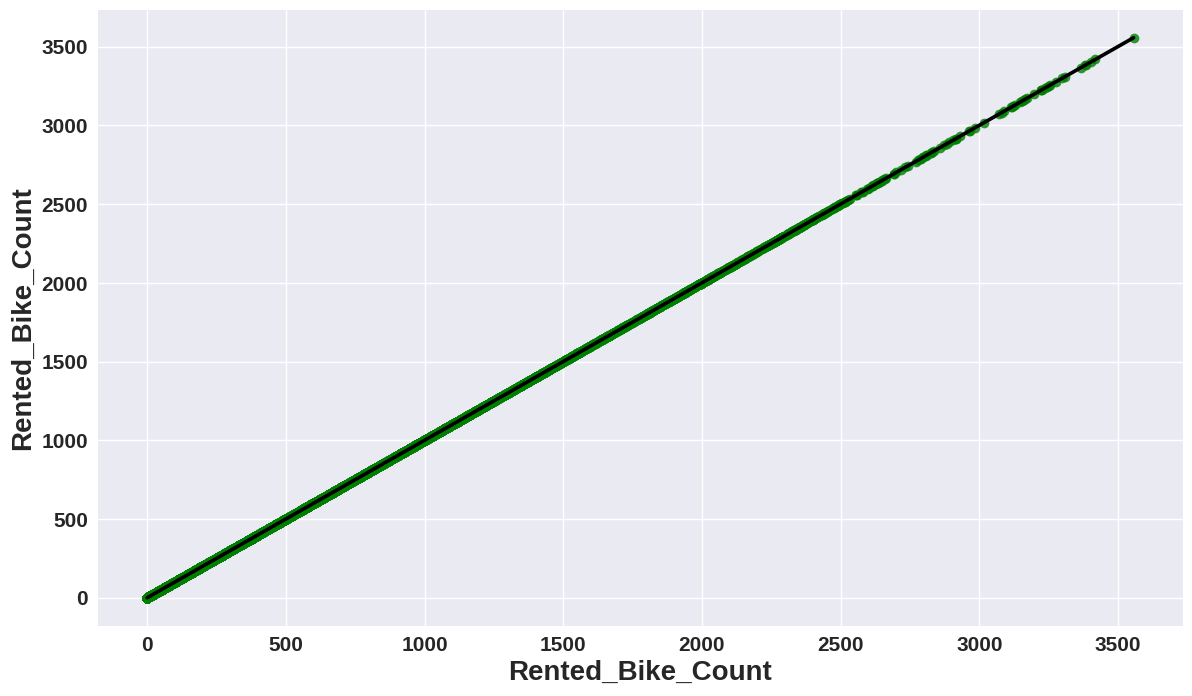

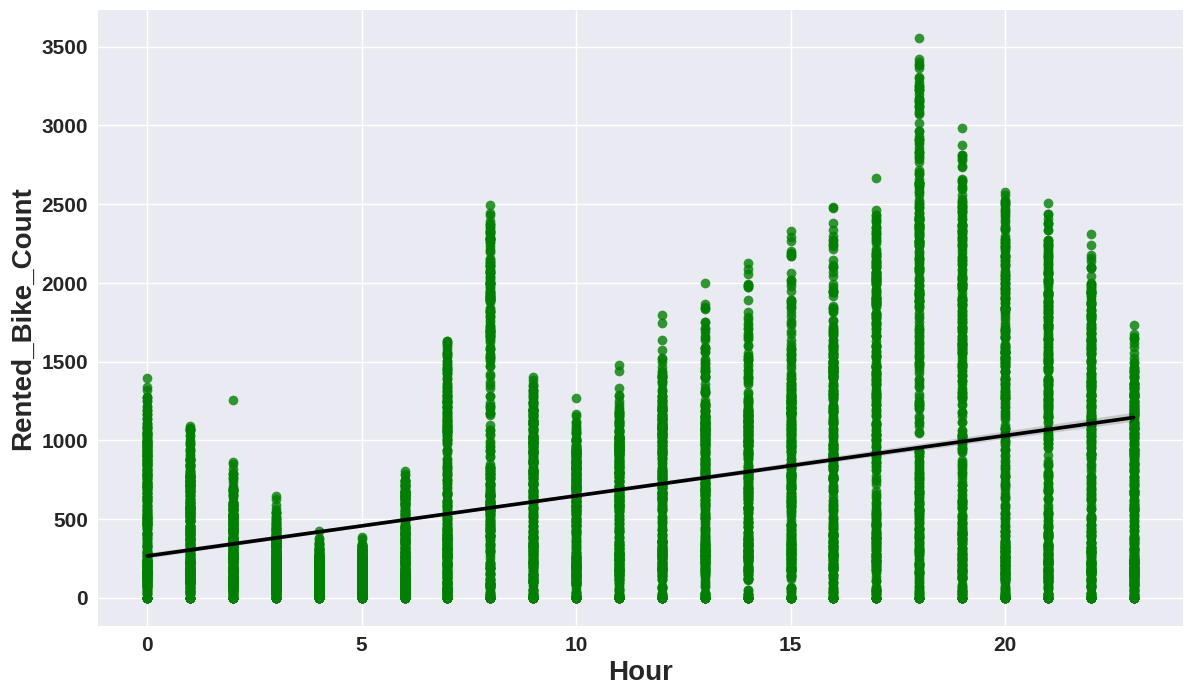

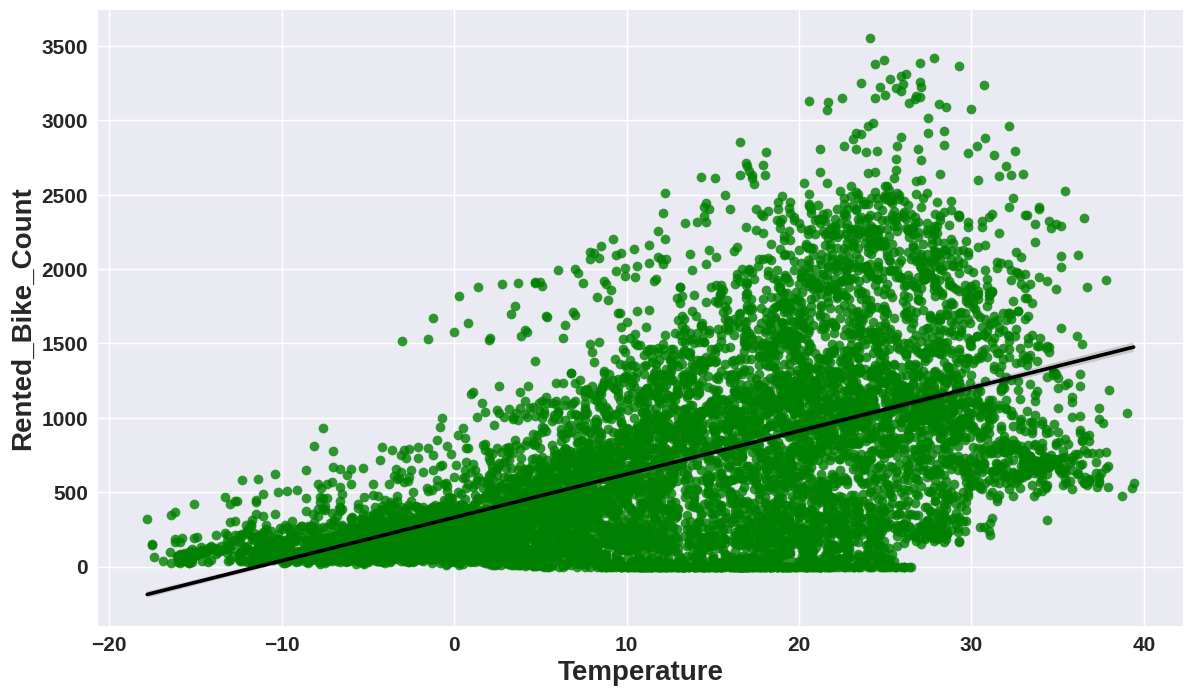

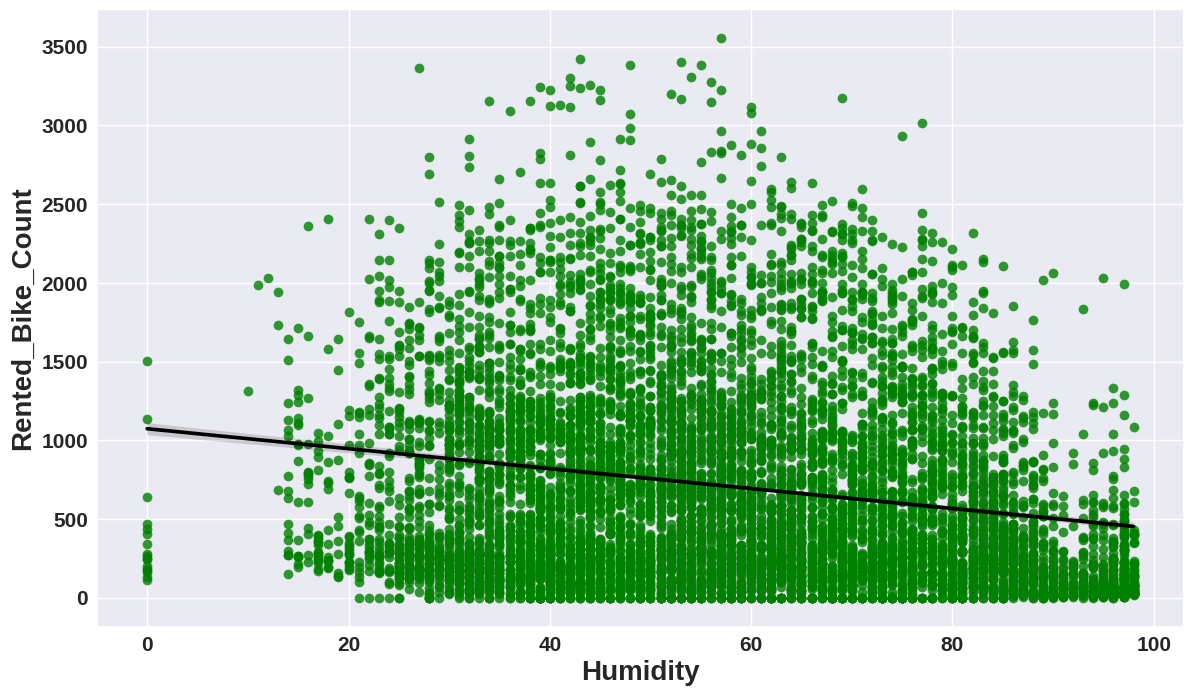

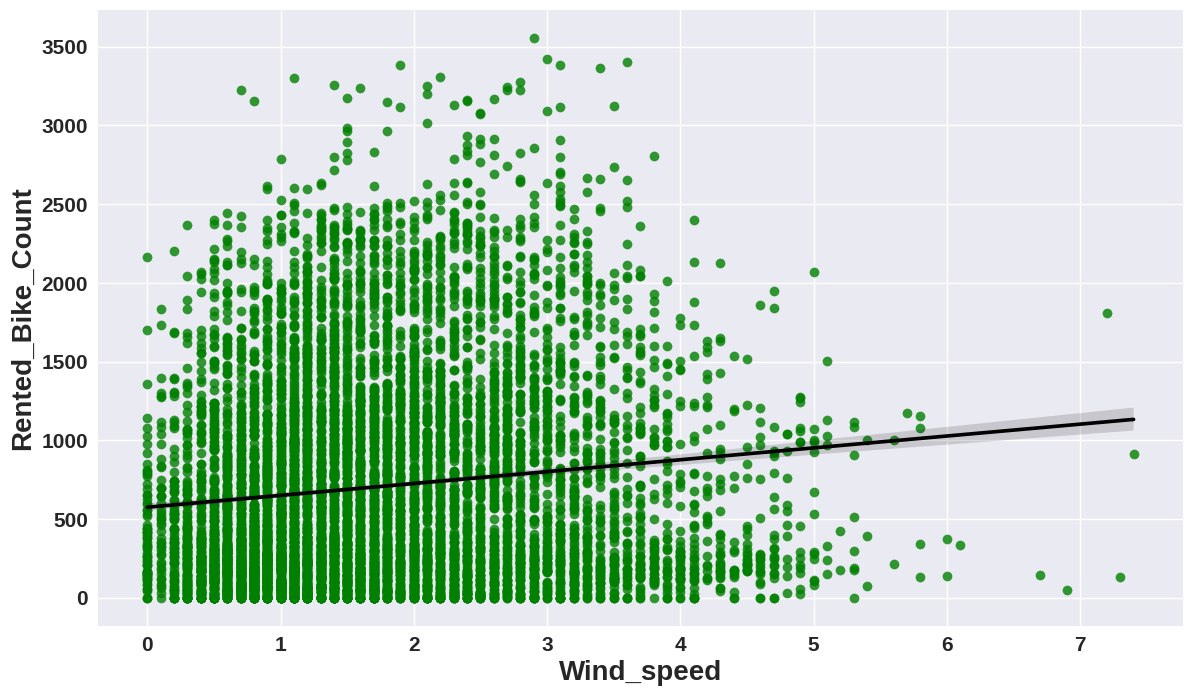

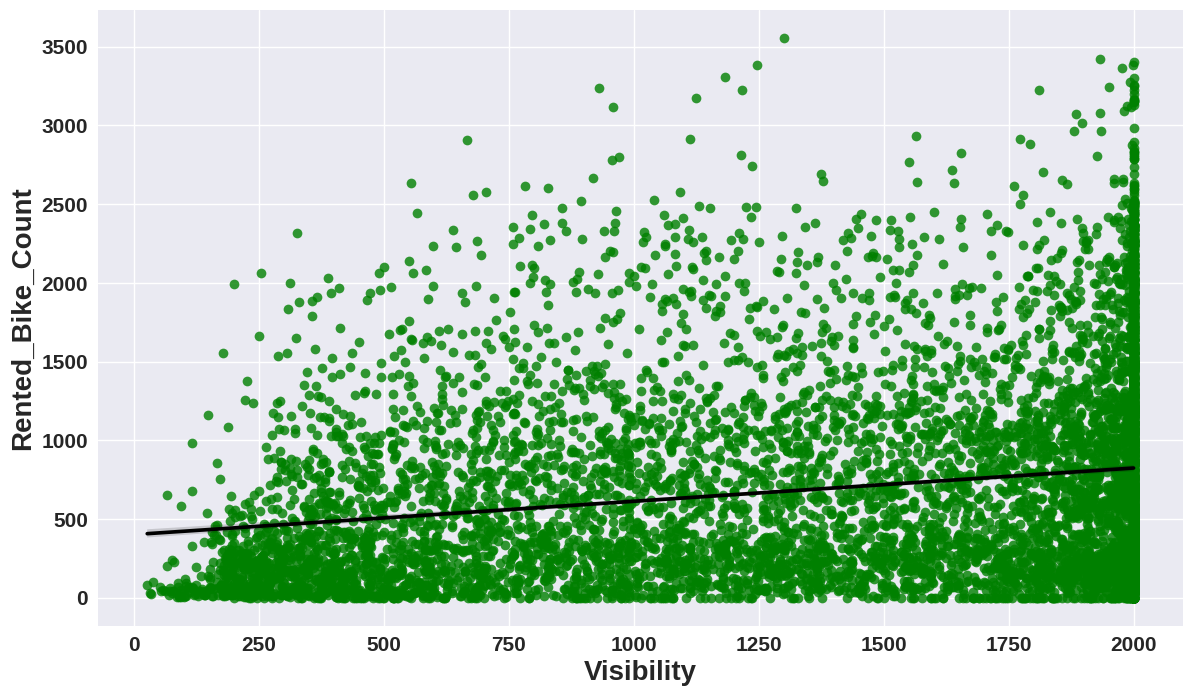

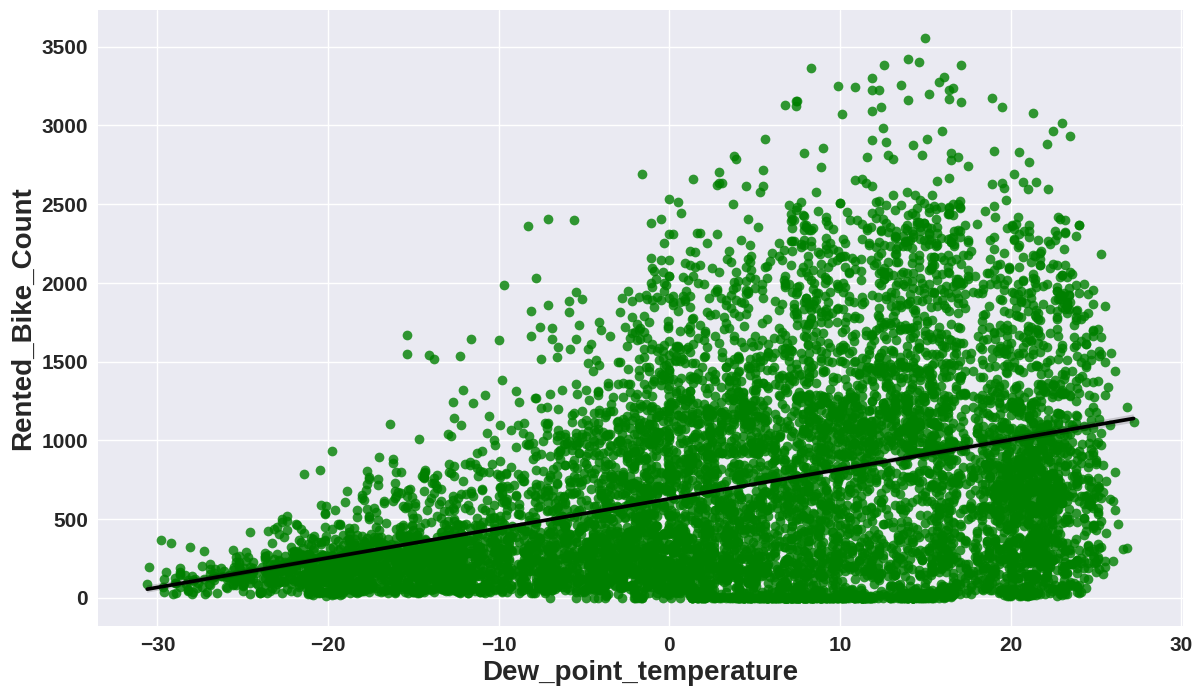

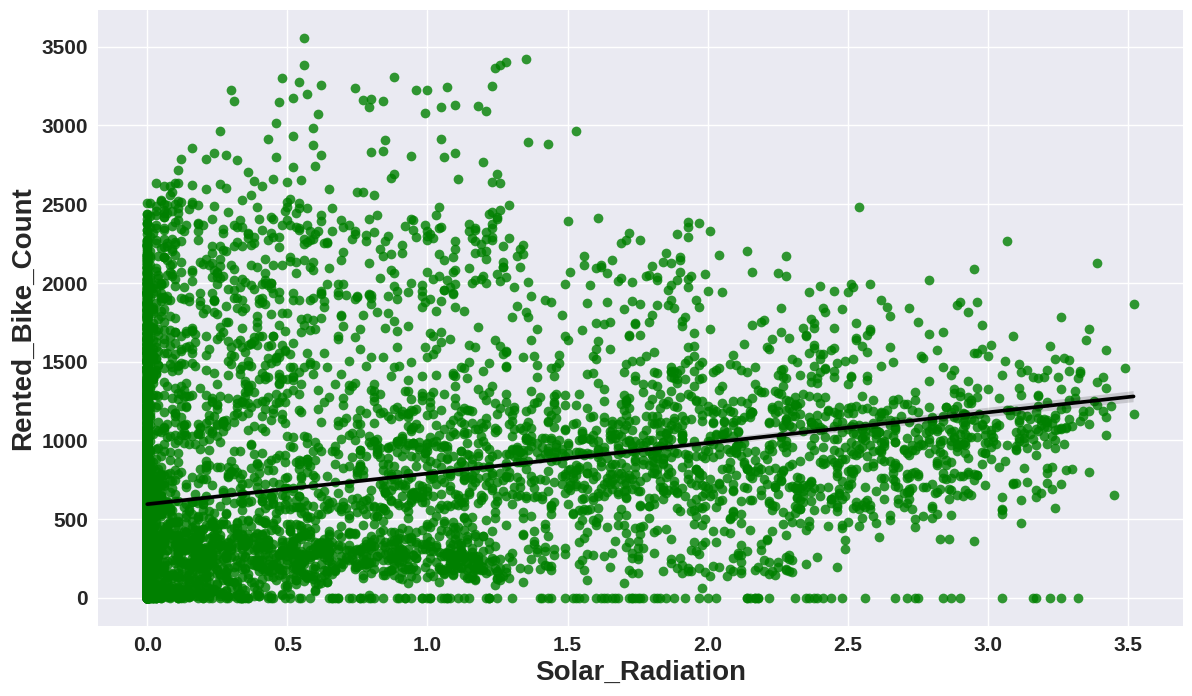

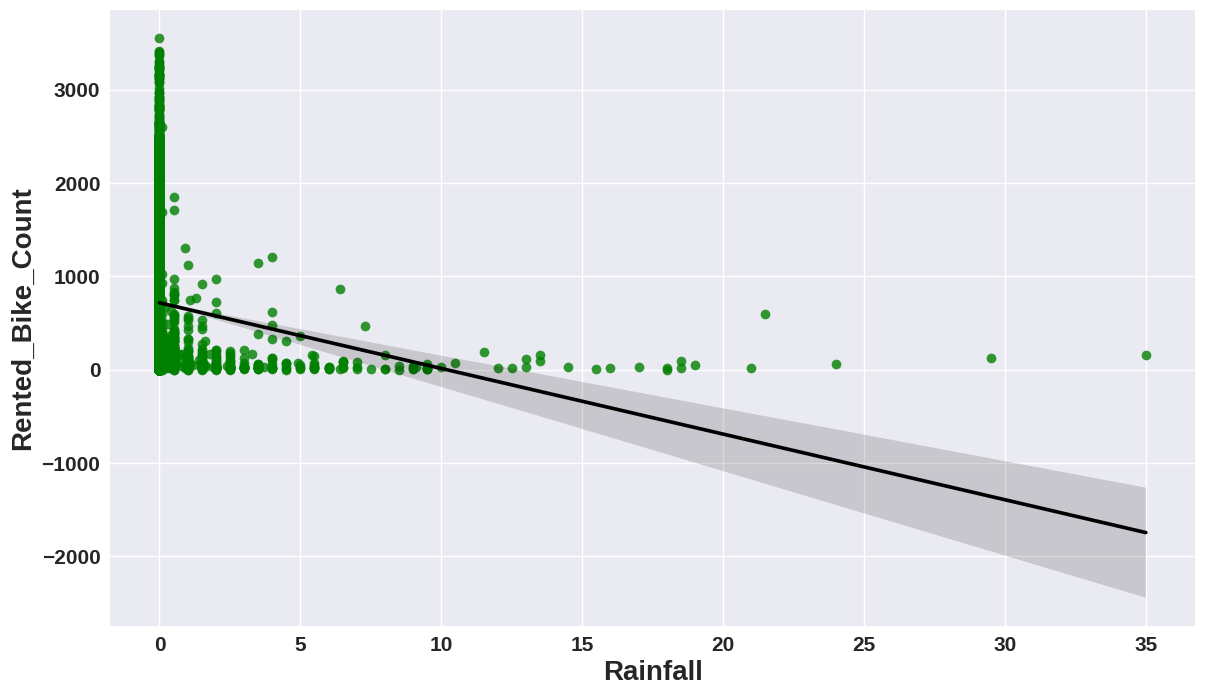

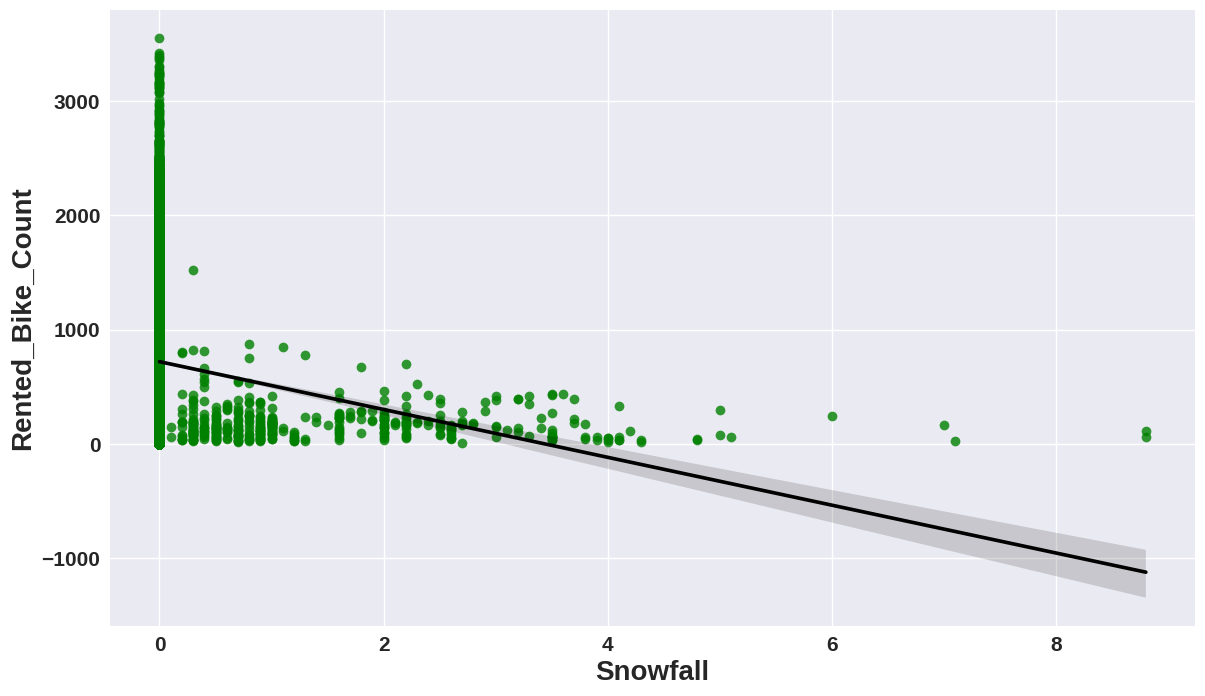

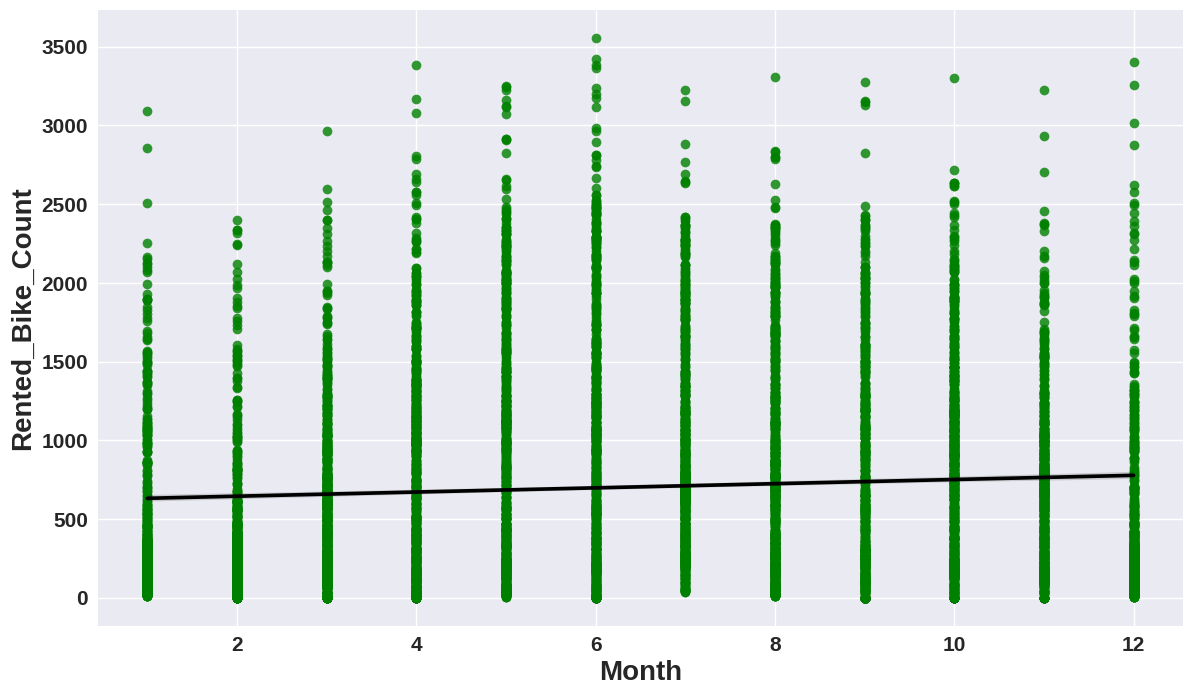

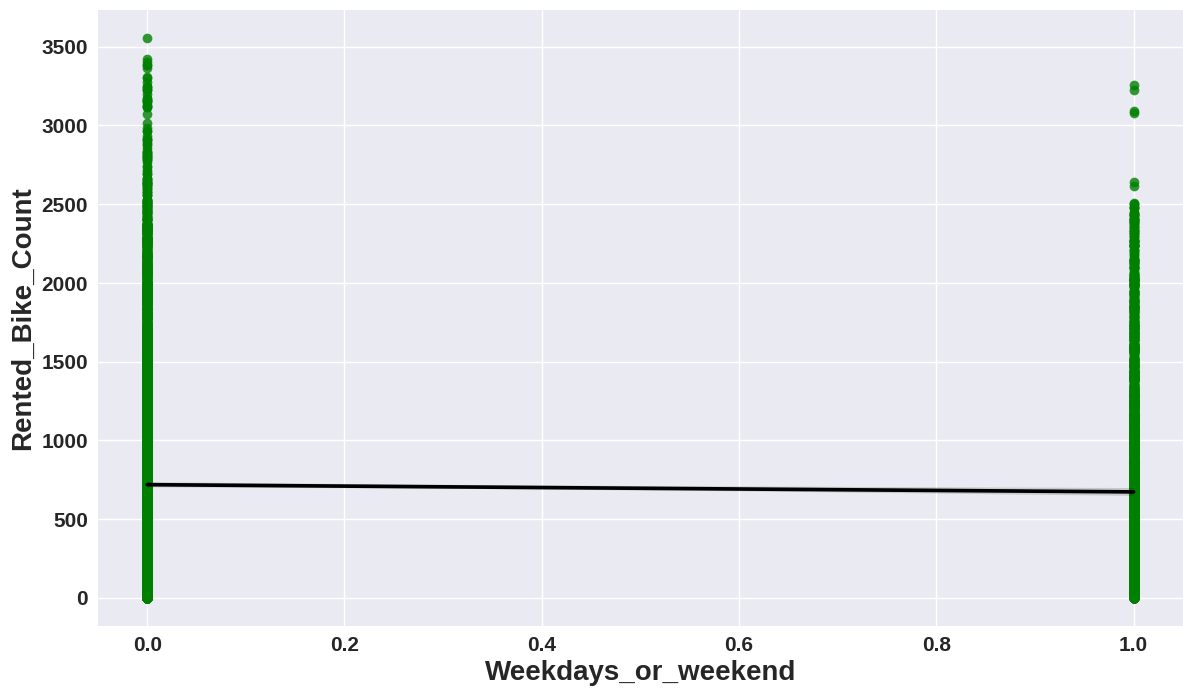

In [ ]:
for col in numeric_col:
  plt.figure(figsize=(14,8))
  ax=fig.gca()
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={'color':'green'},line_kws={'color':'black'})

From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable,which means the rented bike count increases with increase of these features.

'Rainfall',‘ Snowfall’, 'Humidity' these features are negatively related with the target variable which means the rented bike count decreases when these features increase.



**Hour:**

1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.

2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.

3) We can say that,from morning 7 AM to Evening 7 PM we have good Bike Rent Count. and from 7 PM to 7 AM Bike Rent count starts declining.

**Temperature:**

1) For decrease in temperature below 0 deg celicus the bike rent count is significantly decreased because may be people dont want to ride bike in such cold temperature.

2) But for normal temperature the Bike rent count is very high.

**Humidity:**

1) Here its seems like humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

**Wind Speed:**

1) upto wind speed 4 m/s there is good bike rent count.

**Visibility:**

1) It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.

**Dew Point Temperature:**

1)It's again the same case as of temperature. As dew temperature goes below 0 deg celcius there is less bike rent count. It looks like Dew Point temperature and Temperature columns have strong colinarity.

**Solar radiation:**

1)Here the amount of rented bikes is huge, when there is solar radiation.

**Rainfall And snowfall:**

1) Its very obivious that people usually do not like ride bikes in rain and snowfall.

**Checking Corelation between dependent and independent variable.**

<Axes: >

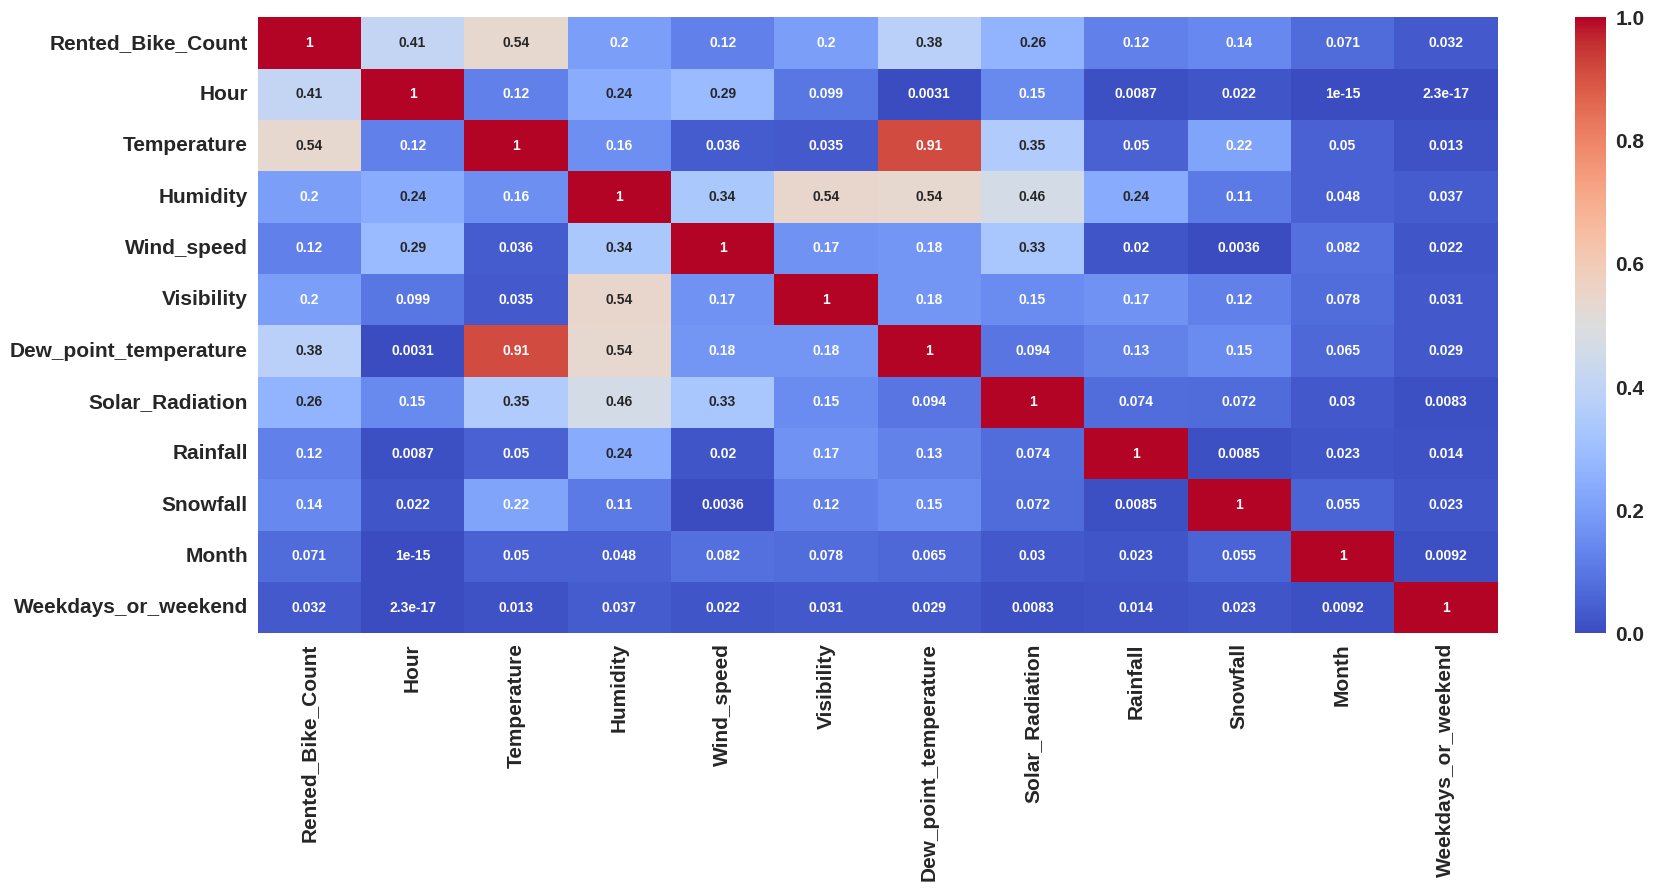

In [ ]:
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')
     

Temperature and Dew point Temperature are highly correlated.

As per our regression assumption, there should not be colinearity between independent variables.

We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.

And also we dropping "Date" column as its not useful for us(as we have created the month, weekdays and weekend columns.)




In [ ]:
# make copy of dataset

df=df.copy()

**Modeling**

**Lets Prepare data for modeling**

In [ ]:
df.head(1)

Empty DataFrame
Columns: [Rented_Bike_Count, Hour, Temperature, Wind_speed, Solar_Radiation, Rainfall, Snowfall, Holiday, Functioning_Day, Month, Weekdays_or_weekend, Seasons_Spring, Seasons_Summer, Seasons_Winter]
Index: []

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Since Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.
df.drop('Dew_point_temperature',inplace=True,axis=1)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

variables       VIF
0                 Hour  3.961874
1          Temperature  3.236809
2             Humidity  6.114153
3           Wind_speed  4.616621
4           Visibility  5.404128
5      Solar_Radiation  2.272068
6             Rainfall  1.081252
7             Snowfall  1.125304
8                Month  4.580307
9  Weekdays_or_weekend  1.399708

humidity vif is greater than 5 so we will remove that column




In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

variables       VIF
0                 Hour  3.931193
1          Temperature  2.543847
2           Wind_speed  4.301342
3           Visibility  5.330632
4      Solar_Radiation  1.894468
5             Rainfall  1.045135
6             Snowfall  1.081123
7                Month  3.741610
8  Weekdays_or_weekend  1.375146

Visibility vif is greater than 5 so we will remove that column

In [ ]:

Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

variables       VIF
0                 Hour  3.755736
1          Temperature  2.492225
2           Wind_speed  3.748534
3      Solar_Radiation  1.893823
4             Rainfall  1.030569
5             Snowfall  1.077566
6                Month  3.049391
7  Weekdays_or_weekend  1.350943

Now we have VIF values in the range of 1 to 5. we will drop 'Humidity','Visibility' this columns from our dataset

In [ ]:
# As per above vif calculation dropping humidity and visibility columns.
df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [ ]:
# checking categoiries in season column.
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# Createing dummy variables
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [ ]:
# checking categoiries in holiday columns.
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [ ]:
# # Labeling for Yes=1 and no No=0
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1, 'No':0})
     

In [ ]:
# checking dummy and labled columns
df.head(3)

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0                254     0         -5.2         2.2              0.0   
1                204     1         -5.5         0.8              0.0   
2                173     2         -6.0         1.0              0.0   

   Rainfall  Snowfall  Holiday  Functioning_Day  Month  Weekdays_or_weekend  \
0       0.0       0.0        0                1      1                    0   
1       0.0       0.0        0                1      1                    0   
2       0.0       0.0        0                1      1                    0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  
0               0               0               1  
1               0               0               1  
2               0               0               1

In [ ]:
# final info before going for modeling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Wind_speed           8760 non-null   float64
 4   Solar_Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Holiday              8760 non-null   int64  
 8   Functioning_Day      8760 non-null   int64  
 9   Month                8760 non-null   int64  
 10  Weekdays_or_weekend  8760 non-null   int64  
 11  Seasons_Spring       8760 non-null   uint8  
 12  Seasons_Summer       8760 non-null   uint8  
 13  Seasons_Winter       8760 non-null   uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 778.6 KB


**Linear Regression**

In [ ]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=df.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(df['Rented_Bike_Count'])

In [ ]:
# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
     

In [ ]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6132, 13)
(6132,)
(2628, 13)
(2628,)


In [ ]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Cheeck coefficents
l_reg.coef_    

array([ 13.03412526,  24.3956317 ,   3.35825273,   3.43510298,
       -71.13971093, -10.4763411 ,  -3.00551186,  28.47981875,
         1.05521935,  -0.58930031,  -2.93262797,  -3.58223659,
        -6.45886182])

In [ ]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

In [ ]:
# Check intercept
l_reg.intercept_

-21.477053440248188

In [ ]:
#Checking score
l_reg.score(X_train,y_train)

0.6123528085603556

In [ ]:
# Check intercept
l_reg.intercept_

-21.477053440248188

In [ ]:
# Check score on test dataset
l_reg.score(X_test,y_test)

0.618326967365199

In [ ]:
# y prdiction on train data
y_pred_train=l_reg.predict(X_train)
# y prdiction on test data
y_pred=l_reg.predict(X_test)

**Evaluation On Train Data**

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8555397241788345.
The Mean Squred Error(MSE) is 60.29949292444555.
The Root Mean Squared Error(RMSE) is 7.765274813195316.
The R2 Score is 0.6123528085603556.


In [ ]:
# Create train results dictionary
train_dict={'Model':"Lasoo",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

**Evaluation On Test Data**





In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.834169822951746.
 The Mean Squred Error(MSE) is 58.624247223024895.
The Root Mean Squared Error(RMSE) is 7.656647257319936.
The R2 Score is 0.618326967365199.


In [ ]:
# Create test results dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

Text(0.5, 0, 'y_predicted')

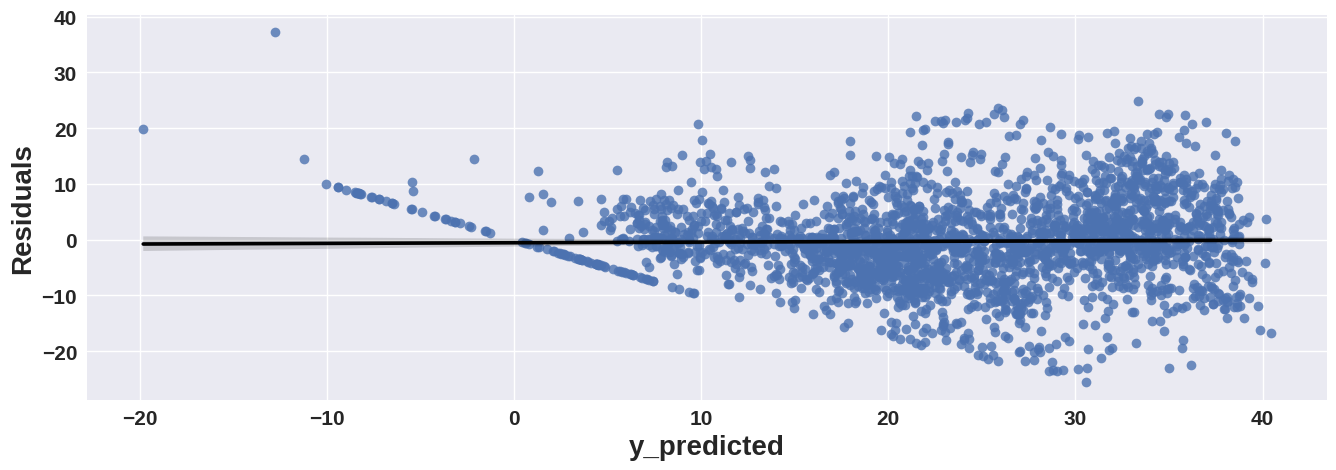

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')
     

In [ ]:
# importing gridsearchcv for hyper parameter tuning
from sklearn.model_selection  import GridSearchCV

GreadSearchCV on Ridge

In [ ]:
# cross validation on Ridge regression
# creating object
ridge_reg=Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

α = 0:

The objective becomes same as simple linear regression. We’ll get the same coefficients as simple linear regression.

α = ∞:

The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.

0 < α < ∞:

The magnitude of α will decide the weightage given to different parts of objective. The coefficients will be somewhere between 0 and ones for simple linear regression

In [ ]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -60.73715246759981


**ElasticNet**

In [ ]:
# creating object of elastic net
elastic_net_reg=ElasticNet(alpha=0.001,l1_ratio=0.5)
elastic_net_reg.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [ ]:
# Check score on train data
elastic_net_reg.score(X_train,y_train)


0.6084747377362095

In [ ]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.6139867979293316

In [ ]:
# predicting Y train values from train data set
y_pred_train=elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred=elastic_net_reg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8932275545714745.
The Mean Squred Error(MSE) is 60.90273656811195.
The Root Mean Squared Error(RMSE) is 7.804020538678249.
The R2 Score is 0.6084747377362095.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.871068266349744.
 The Mean Squred Error(MSE) is 59.2908889405223.
The Root Mean Squared Error(RMSE) is 7.700057723194178.
The R2 Score is 0.6139867979293316.


In [ ]:
test_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

**L1_ratio**

Its range is 0 < = L1_ratio < = 1.

If l1_ratio = 1, the penalty would be L1 penalty. If l1_ratio = 0, the penalty would be an L2 penalty. *If the value of l1 ratio is between 0 and 1, the penalty would be the combination of L1 and L2.

Text(0.5, 0, 'y_predicted')

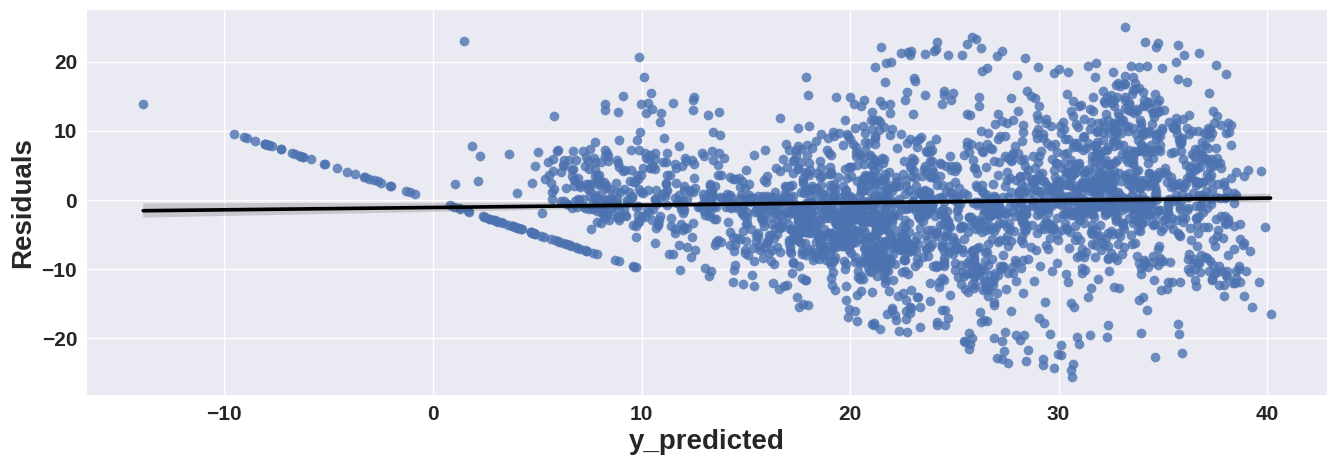

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

**Decision Tree Regressor**

In [ ]:
#import decsion tree packages
from sklearn.tree import DecisionTreeRegressor

# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [ ]:
# Check score on Train dataset
D_tree.score(X_train,y_train)

0.8814250872495163

In [ ]:
# check score on Test dataset.
D_tree.score(X_test,y_test)

0.8371684265827228

In [ ]:
#  predicting y_train_predictions from  X train values
y_pred_train=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred=D_tree.predict(X_test)
     

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.8855165215690715.
The Mean Squred Error(MSE) is 18.44462508772692.
The Root Mean Squared Error(RMSE) is 4.294720606480347.
The R2 Score is 0.8814250872495163.


In [ ]:
# creating dictionary  of Decison tree results( Train dataset)
train_dict={'Model':"Decision Tree Regressor-GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")
     

 The Mean Absolute Error (MAE) is 3.399462618587823.
 The Mean Squred Error(MSE) is 25.010617988466684.
The Root Mean Squared Error(RMSE) is 5.001061686128925.
The R2 Score is 0.8371684265827228.


In [ ]:
test_dict={'Model':"Decision Tree Regressor(GridsearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

Text(0.5, 0, 'y_predicted')

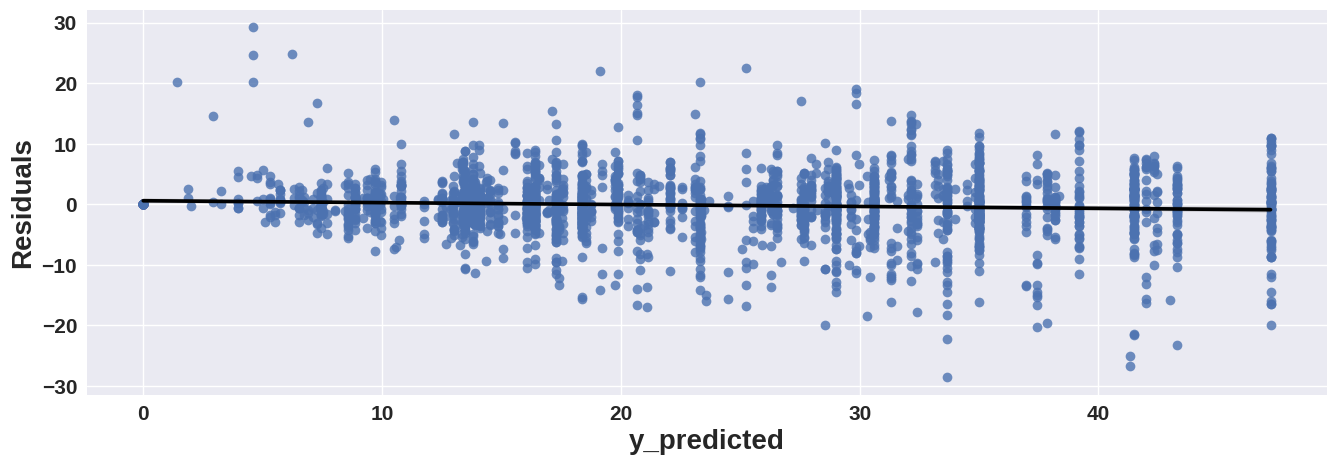

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

**Hyperparameter Tuning**

In [ ]:
# Hyper parameters range intialization for tuning 
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }

In [ ]:
D_tree=DecisionTreeRegressor(max_depth=9,max_features='auto',splitter='best')
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

Text(0.5, 0, 'Relative Importance')

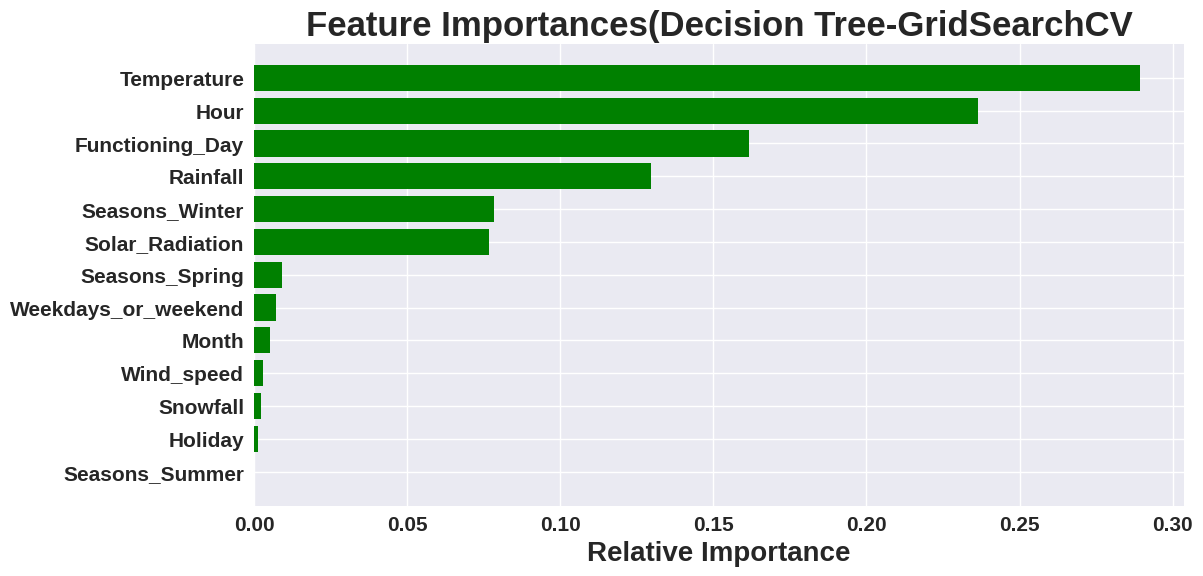

In [ ]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

We have applied this best parametrs to above Decsion tree regressor model

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf.score(X_train,y_train)

0.9861493537542005

In [ ]:
rf.score(X_test,y_test)

0.9072904810501006

In [ ]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 0.9409763312700442.
The Mean Squred Error(MSE) is 2.154502763700848.
The Root Mean Squared Error(RMSE) is 1.467822456464285.
The R2 Score is 0.9861493537542005.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.4862504317096605.
 The Mean Squred Error(MSE) is 14.240004648290274.
The Root Mean Squared Error(RMSE) is 3.773593068719821.
The R2 Score is 0.9072904810501006.


**GridSearchCV On random Forest**

In [ ]:
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [ ]:
rf_reg=RandomForestRegressor()
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [25, 50, 40, 80, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
rf_tuning.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [ ]:
rf=RandomForestRegressor(max_depth=9,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=9)

In [ ]:
#print the unique value
df.nunique()

Rented_Bike_Count      2166
Hour                     24
Temperature             546
Wind_speed               65
Solar_Radiation         345
Rainfall                 61
Snowfall                 51
Holiday                   2
Functioning_Day           2
Month                    12
Weekdays_or_weekend       2
Seasons_Spring            2
Seasons_Summer            2
Seasons_Winter            2
dtype: int64

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 0.9409763312700442.
The Mean Squred Error(MSE) is 2.154502763700848.
The Root Mean Squared Error(RMSE) is 1.467822456464285.
The R2 Score is 0.9861493537542005.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.4862504317096605.
 The Mean Squred Error(MSE) is 14.240004648290274.
The Root Mean Squared Error(RMSE) is 3.773593068719821.
The R2 Score is 0.9072904810501006.


Text(0.5, 0, 'y_predicted')

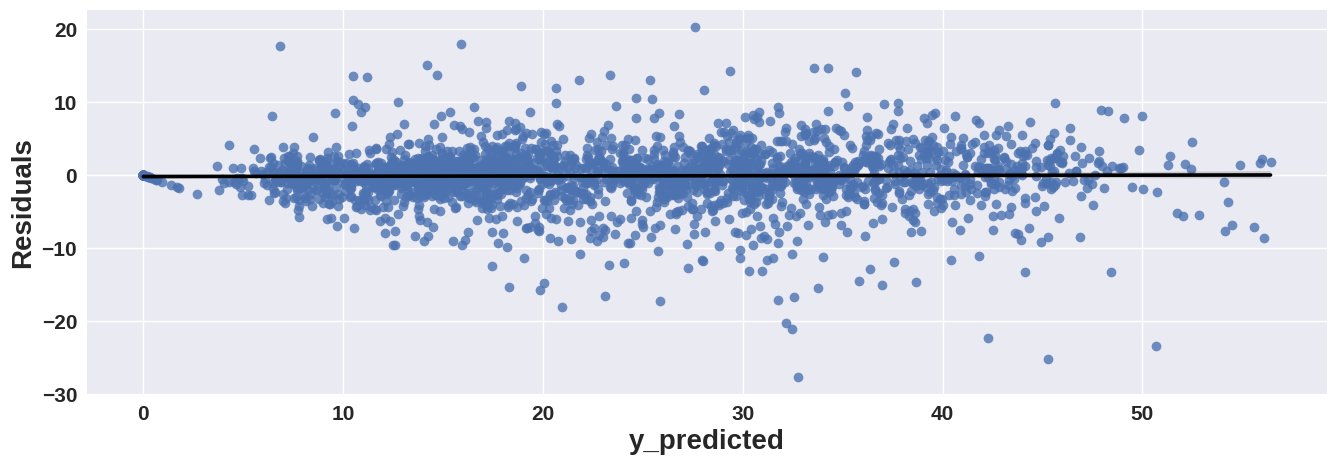

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

**By looking at the graph we can say that temperature and hours plays very important role on bike rentals.**

**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }


                 
# 1)n_estimators : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
# 2)learning_rate:Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
# 3)max_depth : Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; 
#the best value depends on the interaction of the input variables.

#4)subsample, default=1.0
#The fraction of samples to be used for fitting the individual base learners. 
#If smaller than 1.0 this results in Stochastic Gradient Boosting. 
#subsample interacts with the parameter n_estimators. 
#Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")
     

The Mean Absolute Error (MAE) is 0.9409763312700442.
The Mean Squred Error(MSE) is 2.154502763700848.
The Root Mean Squared Error(RMSE) is 1.467822456464285.
The R2 Score is 0.9861493537542005.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.4862504317096605.
 The Mean Squred Error(MSE) is 14.240004648290274.
The Root Mean Squared Error(RMSE) is 3.773593068719821.
The R2 Score is 0.9072904810501006.


Text(0.5, 0, 'y_predicted')

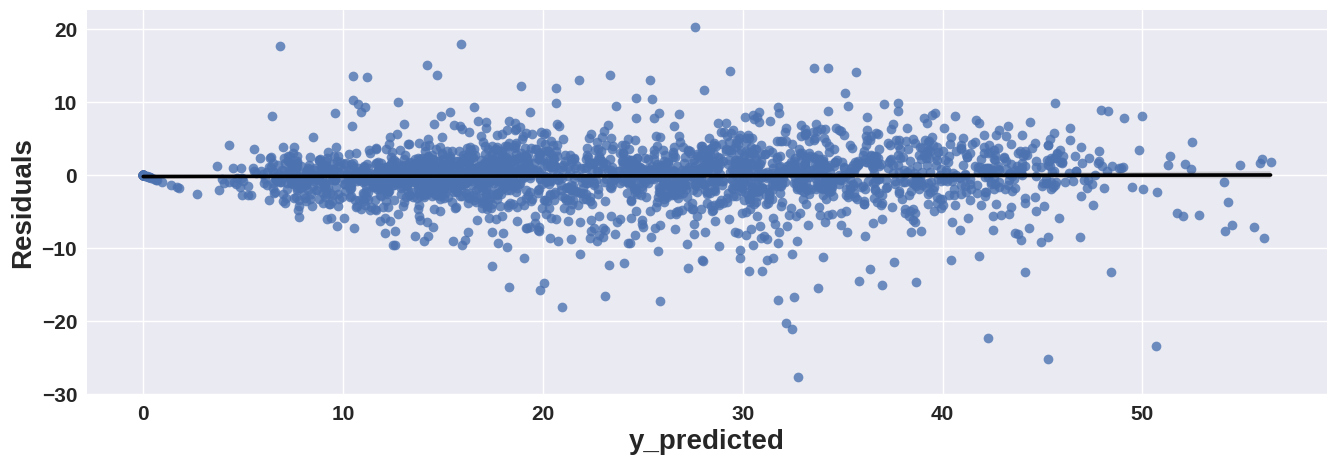

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

In [ ]:
df.dtypes

Rented_Bike_Count        int64
Hour                     int64
Temperature            float64
Wind_speed             float64
Solar_Radiation        float64
Rainfall               float64
Snowfall               float64
Holiday                  int64
Functioning_Day          int64
Month                    int64
Weekdays_or_weekend      int64
Seasons_Spring           uint8
Seasons_Summer           uint8
Seasons_Winter           uint8
dtype: object

In [ ]:
df.describe()

Rented_Bike_Count         Hour  Temperature   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922     1.724909   
std           644.997468     6.922582    11.944825     1.036300   
min             0.000000     0.000000   -17.800000     0.000000   
25%           191.000000     5.750000     3.500000     0.900000   
50%           504.500000    11.500000    13.700000     1.500000   
75%          1065.250000    17.250000    22.500000     2.300000   
max          3556.000000    23.000000    39.400000     7.400000   

       Solar_Radiation     Rainfall     Snowfall      Holiday  \
count      8760.000000  8760.000000  8760.000000  8760.000000   
mean          0.569111     0.148687     0.075068     0.049315   
std           0.868746     1.128193     0.436746     0.216537   
min           0.000000     0.000000     0.000000     0.000000   
25%           0.000000     0.000000     0.000000     0.000000   
50%           0.010000     0.000000     0.000000     0.000000   
75%           0.930000     0.000000     0.000000     0.000000   
max           3.520000    35.000000     8.800000     1.000000   

       Functioning_Day        Month  Weekdays_or_weekend  Seasons_Spring  \
count      8760.000000  8760.000000          8760.000000     8760.000000   
mean          0.966324     6.526027             0.290411        0.252055   
std           0.180404     3.448048             0.453978        0.434217   
min           0.000000     1.000000             0.000000        0.000000   
25%           1.000000     4.000000             0.000000        0.000000   
50%           1.000000     7.000000             0.000000        0.000000   
75%           1.000000    10.000000             1.000000        1.000000   
max           1.000000    12.000000             1.000000        1.000000   

       Seasons_Summer  Seasons_Winter  
count     8760.000000     8760.000000  
mean         0.252055        0.246575  
std          0.434217        0.431042  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          0.000000        0.000000  
75%          1.000000        0.000000  
max          1.000000        1.000000

In [ ]:
#droping nun
df.dropna(inplace=True)

In [ ]:
df.index.nunique()

8760

In [ ]:
# checking unique count
for i in df.columns:
  print(i,df[i].nunique())

Rented_Bike_Count 2166
Hour 24
Temperature 546
Wind_speed 65
Solar_Radiation 345
Rainfall 61
Snowfall 51
Holiday 2
Functioning_Day 2
Month 12
Weekdays_or_weekend 2
Seasons_Spring 2
Seasons_Summer 2
Seasons_Winter 2


In [ ]:
df.tail()

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
8755               1003    19          4.2         2.6              0.0   
8756                764    20          3.4         2.3              0.0   
8757                694    21          2.6         0.3              0.0   
8758                712    22          2.1         1.0              0.0   
8759                584    23          1.9         1.3              0.0   

      Rainfall  Snowfall  Holiday  Functioning_Day  Month  \
8755       0.0       0.0        0                1     11   
8756       0.0       0.0        0                1     11   
8757       0.0       0.0        0                1     11   
8758       0.0       0.0        0                1     11   
8759       0.0       0.0        0                1     11   

      Weekdays_or_weekend  Seasons_Spring  Seasons_Summer  Seasons_Winter  
8755                    0               0               0               0  
8756                    0               0               0               0  
8757                    0               0               0               0  
8758                    0               0               0               0  
8759                    0               0               0               0

In [ ]:
#checking Duplicate values
values=len(df[df.duplicated()])
print("The number of duplicate value in the data set is = ",0)

The number of duplicate value in the data set is =  0


# Breaking date column

# Cross Correlation Matrix

<Axes: >

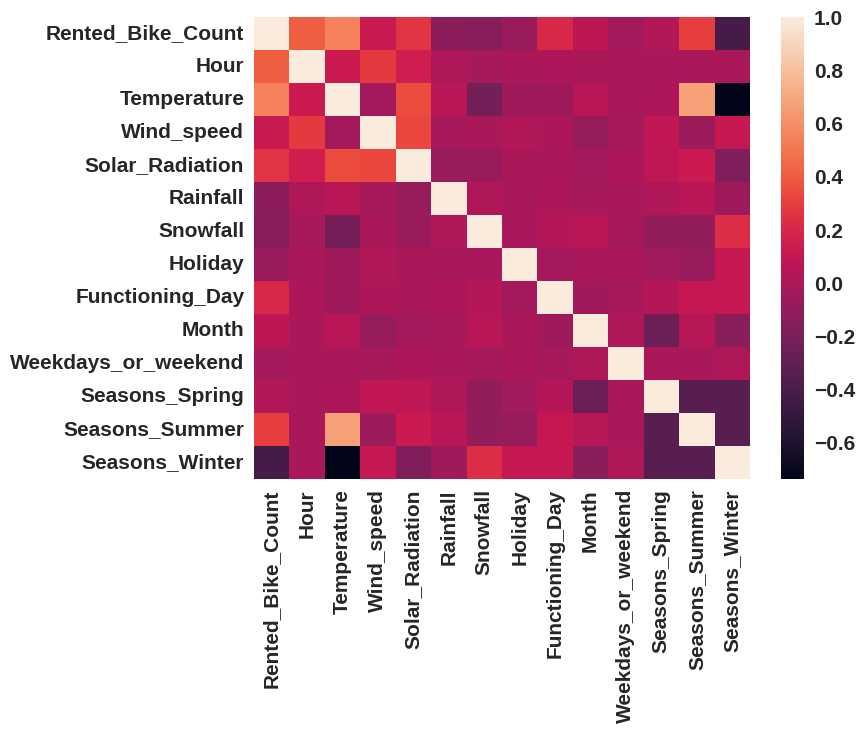

In [ ]:
plt.subplots(figsize=(8,6))
sns.heatmap(df.corr())

# Split the data

Let,s make a simple manual split for now.

In [ ]:
n = len(df)
df=df[:int(0.8*n)].copy()
df=df[int(0.8*n):].copy()


# Normalize the data

We just need to normalize the non-
categorical data .so ,first we define them
and then normalize those columns only.

In [ ]:
df.count()

Rented_Bike_Count      0
Hour                   0
Temperature            0
Wind_speed             0
Solar_Radiation        0
Rainfall               0
Snowfall               0
Holiday                0
Functioning_Day        0
Month                  0
Weekdays_or_weekend    0
Seasons_Spring         0
Seasons_Summer         0
Seasons_Winter         0
dtype: int64

In [ ]:
df.skew()

Rented_Bike_Count     NaN
Hour                  NaN
Temperature           NaN
Wind_speed            NaN
Solar_Radiation       NaN
Rainfall              NaN
Snowfall              NaN
Holiday               NaN
Functioning_Day       NaN
Month                 NaN
Weekdays_or_weekend   NaN
Seasons_Spring        NaN
Seasons_Summer        NaN
Seasons_Winter        NaN
dtype: float64

Conclusion**

As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.

Our assumption: if the difference of R2 score between Train data and Test is more than 5 % we will consider it as over fitting.

Linear, Lasso, Ridge and Elastic Net:

Linear, Lasso, Ridge and Elastic regression models have almost similar R2 scores(61%) on both training and test data.(Even after using GridserachCV we have got similar results as of base models).

Decision Tree Regression:

On Decision tree regressor model, without hyper-parameter tuning, we got r2 score as 100% on training data and on test data it was very less. Thus our model memorized the data. So it was a over fitted model. After hyper-parameter tuning we got r2 score as 88% on training data and 83% on test data which is quite good for us.

Random Forest:

On Random Forest regressor model, without hyper-parameter tuning we got r2 score as 98% on training data and 90% on test data. Thus our model memorized the data. So it was a over fitted model, as per our assumption After hyper-parameter tuning we got r2 score as 90% on training data and 87% on test data which is very good for us.

Gradient Boosting Regression(Gradient Boosting Machine): On Random Forest regressor model, without hyper-parameter tuning we got r2 score as 86% on training data and 85% on test data. Our model performed well without hyper-parameter tuning. After hyper-parameter tuning we got r2 score as 96% on training data and 91% on test data, thus we improved the model performance by hyper-parameter tuning.

**Thus Gradient Boosting Regression(GridSearchCV) and Random forest(GridSearchCv) gives good r2 scores. We can deploy this models.**
